In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# **1. SalePrice**

In [2]:
train_df = pd.read_csv('train.csv')
train_df.shape


(1460, 81)

In [3]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [4]:
# Display summary statistics for the 'SalePrice' column
sale_price_stats = train_df['SalePrice'].describe()

# Show the statistics
sale_price_stats

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

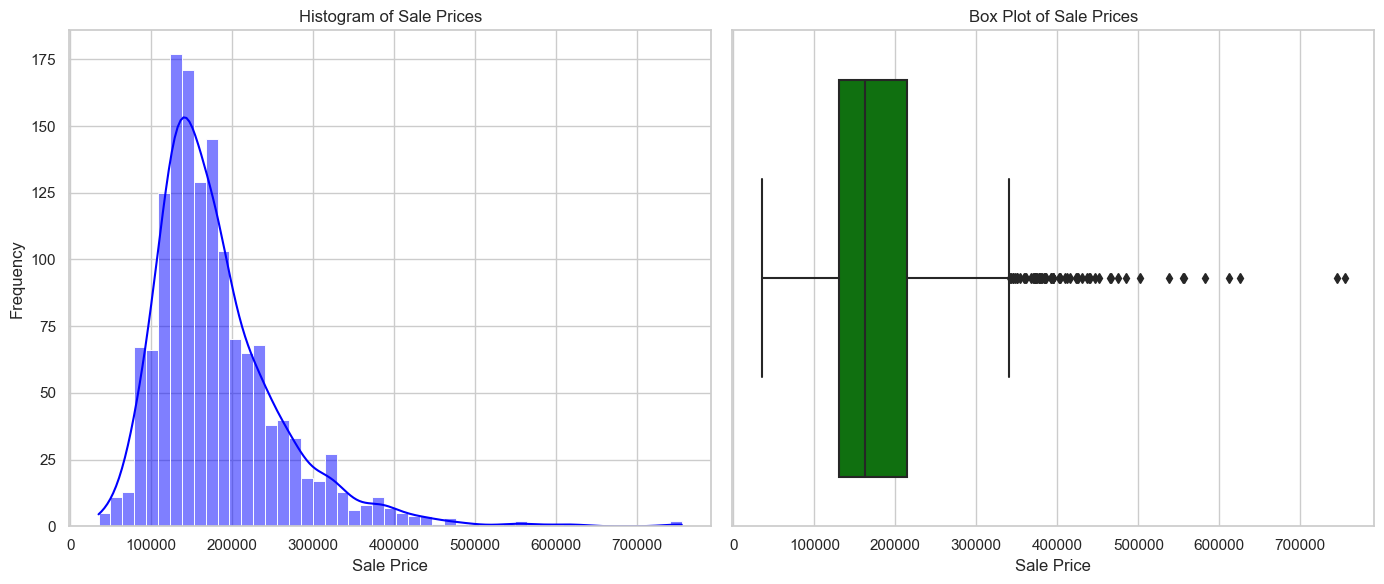

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 6))

# Create a subplot for histogram
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, color='blue')
plt.title('Histogram of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Create a subplot for box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['SalePrice'], color='green')
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')

# Show the plots
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_df = train_df[(train_df['SalePrice'] >= lower_bound) & (train_df['SalePrice'] <= upper_bound)]

print("Original data count:", len(train_df))
print("Filtered data count:", len(filtered_df))

Original data count: 1460
Filtered data count: 1399


In [7]:
df = pd.read_csv('filtered_data.csv')
df.shape

(1399, 81)

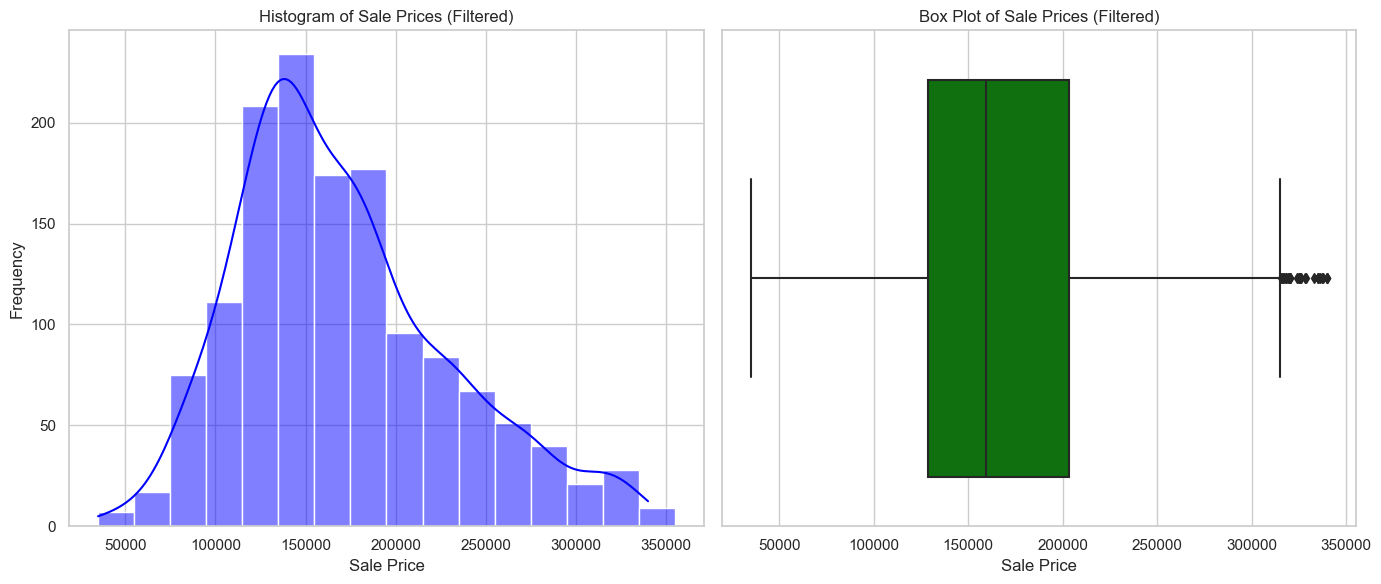

In [8]:
# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 6))

# Create a subplot for the histogram using seaborn
plt.subplot(1, 2, 1)
sns.histplot(filtered_df['SalePrice'], kde=True, color='blue', binwidth=20000)
plt.title('Histogram of Sale Prices (Filtered)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Create a subplot for the box plot using seaborn
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['SalePrice'], color='green')
plt.title('Box Plot of Sale Prices (Filtered)')
plt.xlabel('Sale Price')

# Show the plots
plt.tight_layout()
plt.show()

In [9]:
# Save the filtered dataset to a new CSV file
filtered_df.to_csv('filtered_data.csv', index=False)  # Set index=False to not save row indices

print("Filtered dataset saved as 'filtered_data.csv'.")

Filtered dataset saved as 'filtered_data.csv'.


In [10]:
df = pd.read_csv('filtered_data.csv')
df.shape

(1399, 81)

# **2. Numberical feature**

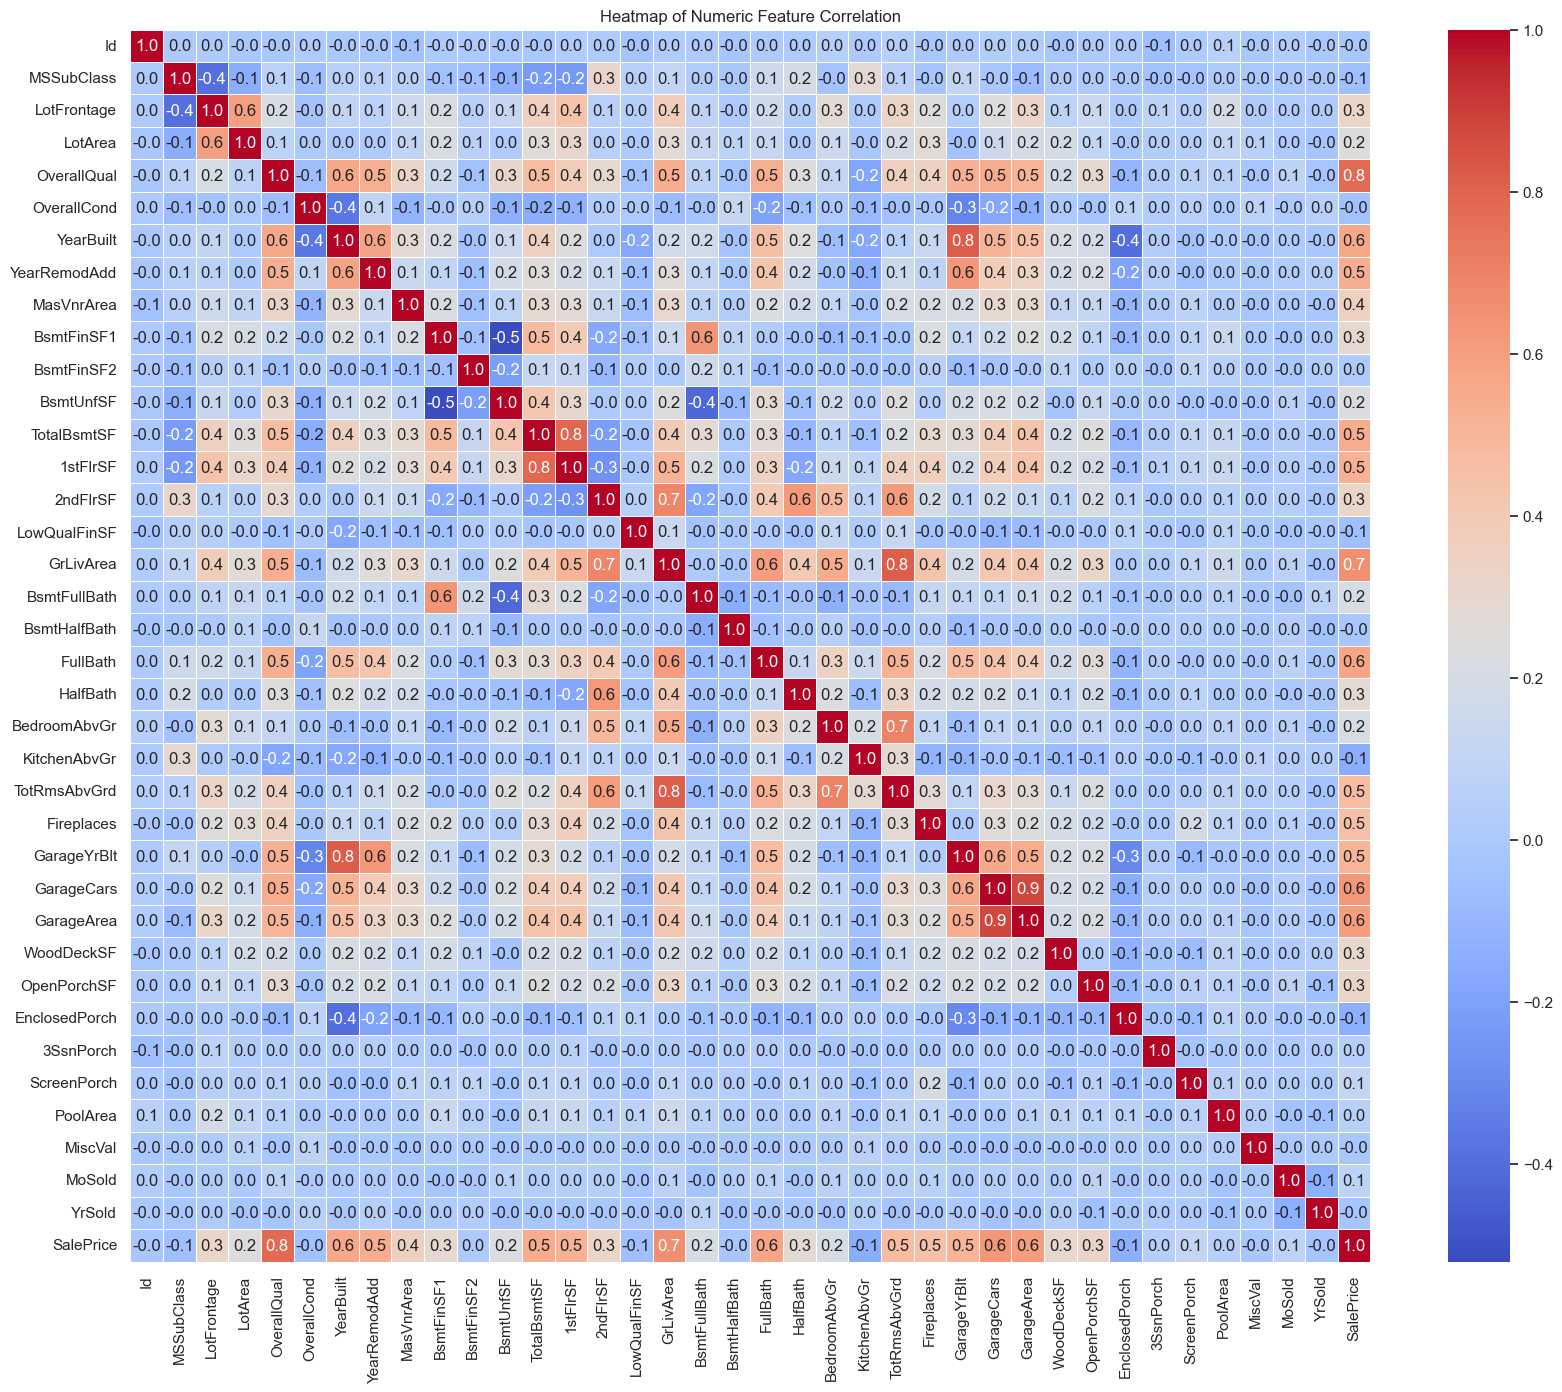

In [11]:
# Select numeric features
numeric_features = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create the heatmap with annotations
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Numeric Feature Correlation')
plt.show()

C:\Users\Tien Tran\AppData\Local\Temp\ipykernel_5816\1023540088.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  conti_corre = df.corr()


<Axes: >

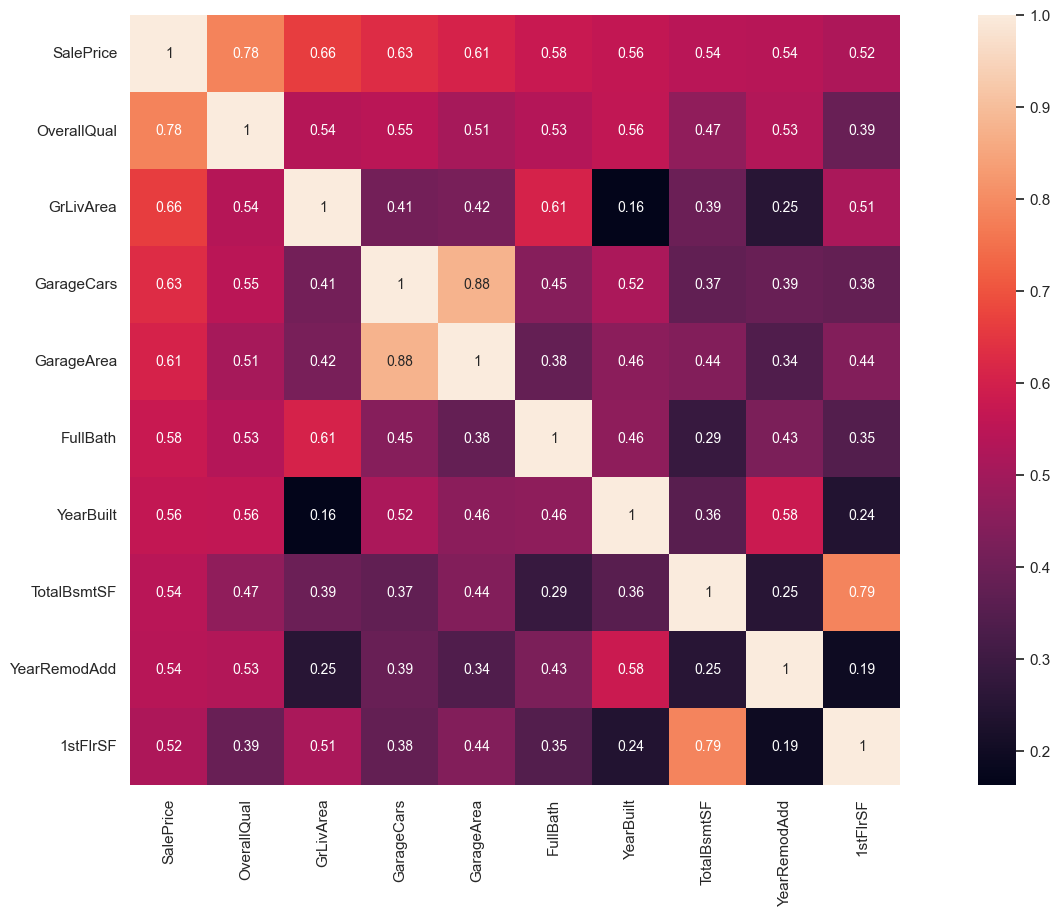

In [12]:
#correlation check for each feature with target feature and plot the first ten high corr features
df['GarageYrBlt'] = df['GarageYrBlt'].astype('float64')
conti_corre = df.corr()
plt.subplots(figsize=(20,10))
cols = conti_corre.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, vmax=1,annot=True, square=True,annot_kws={'size': 10},
           yticklabels=cols.values, xticklabels=cols.values)

# **3. Catorigal feature**

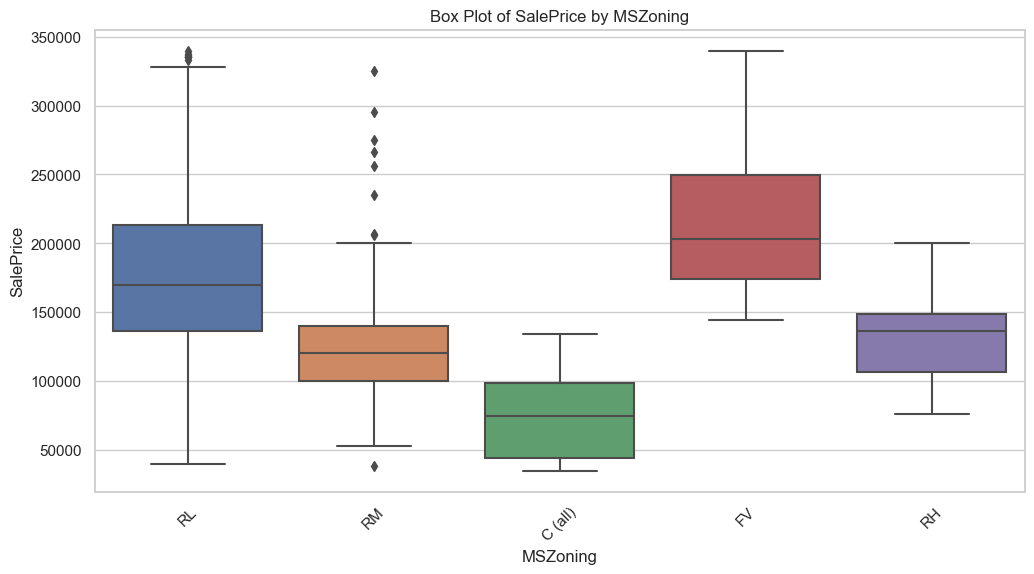

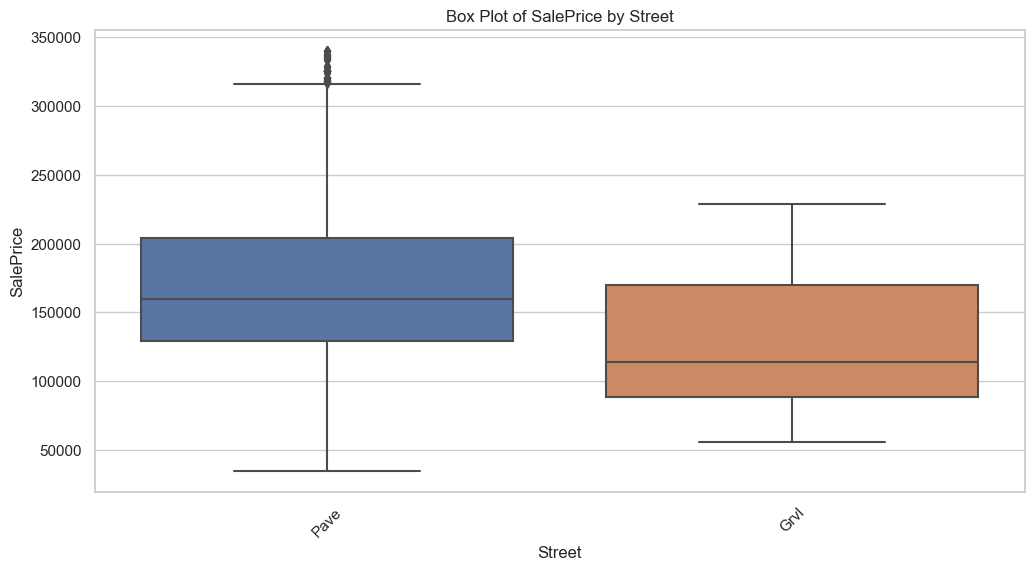

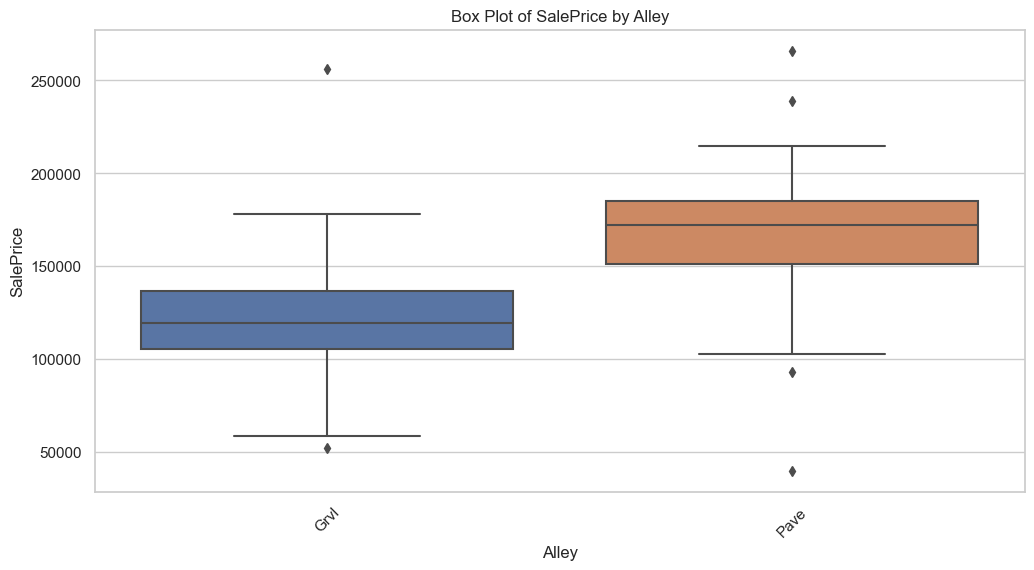

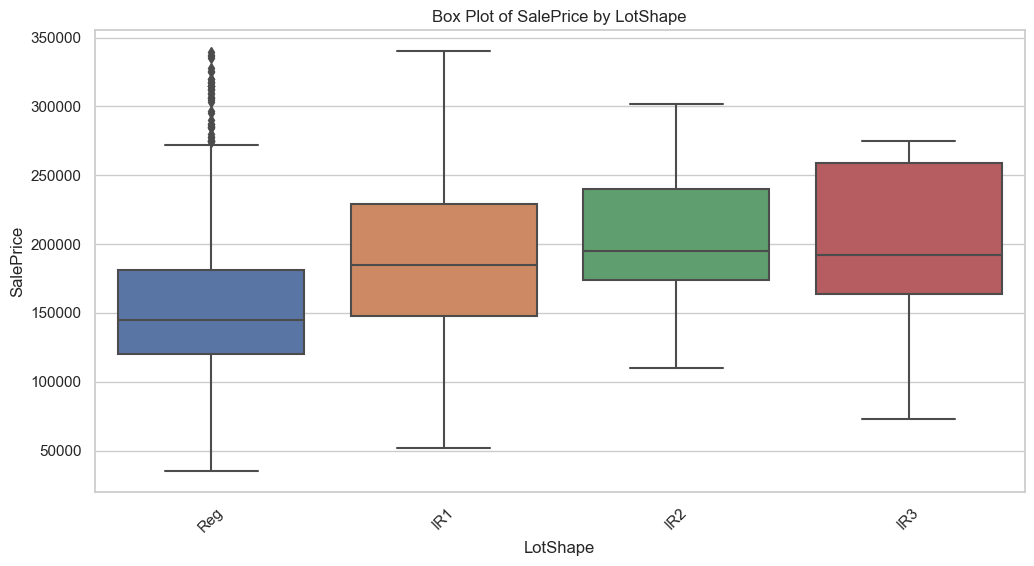

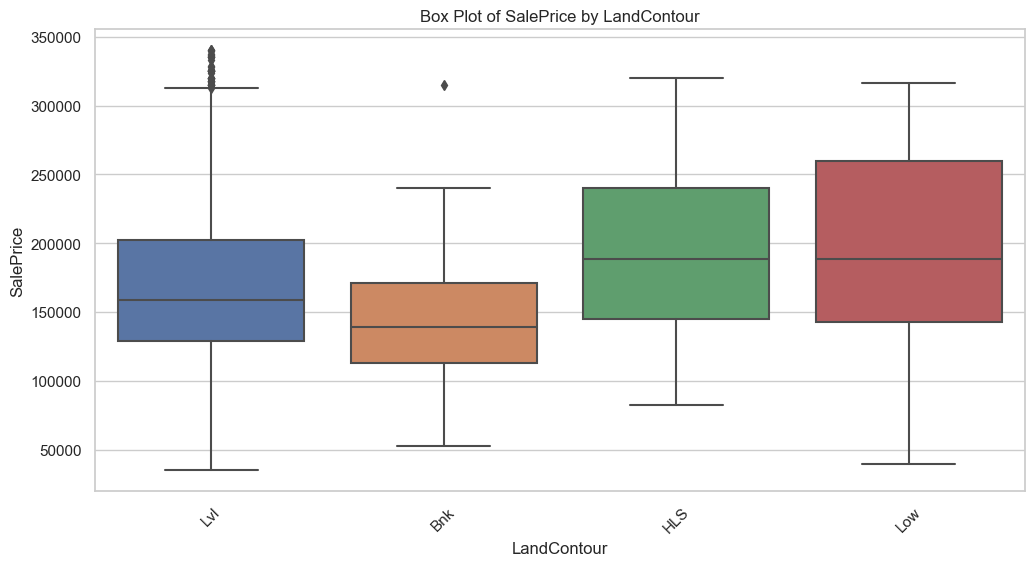

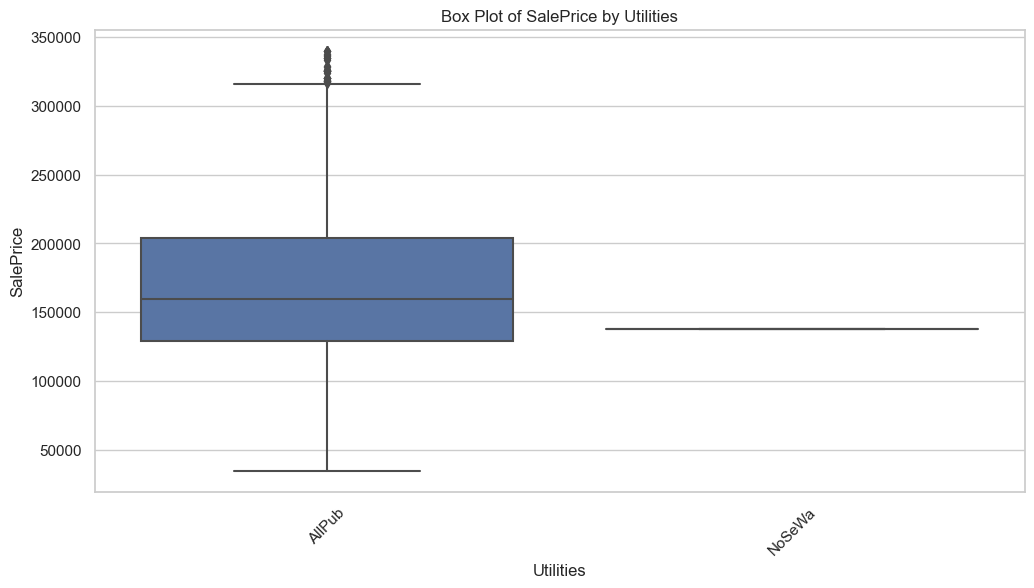

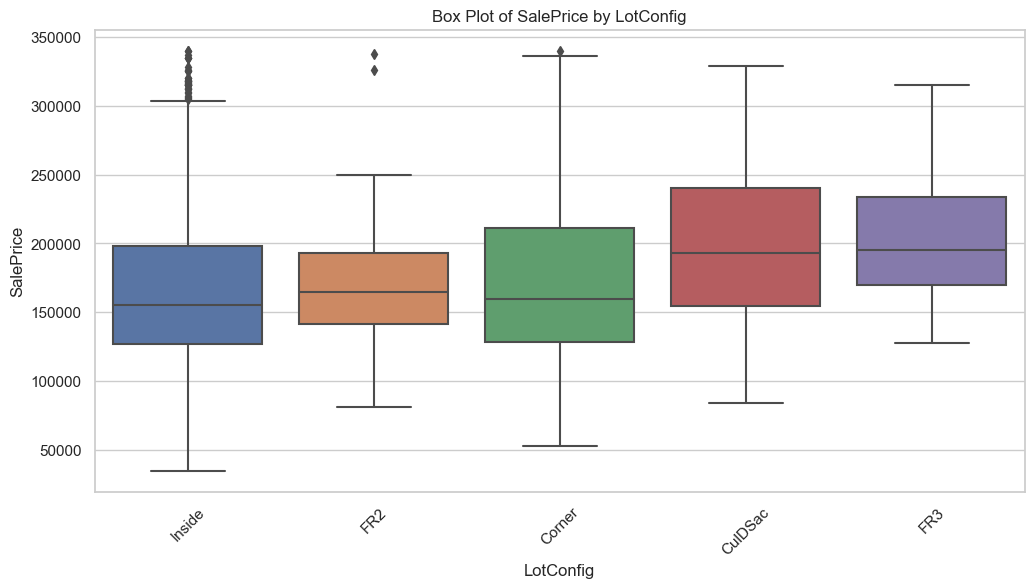

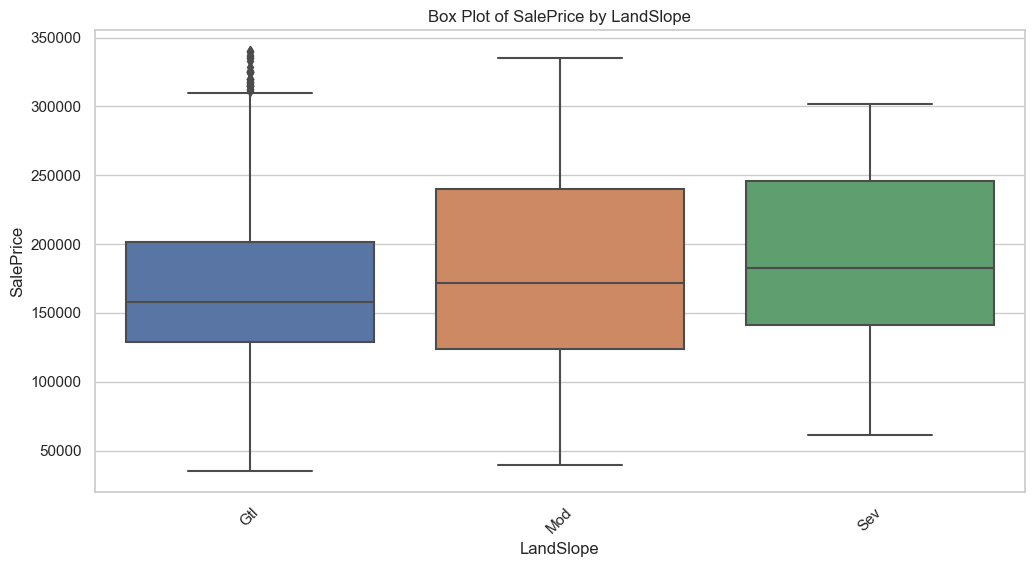

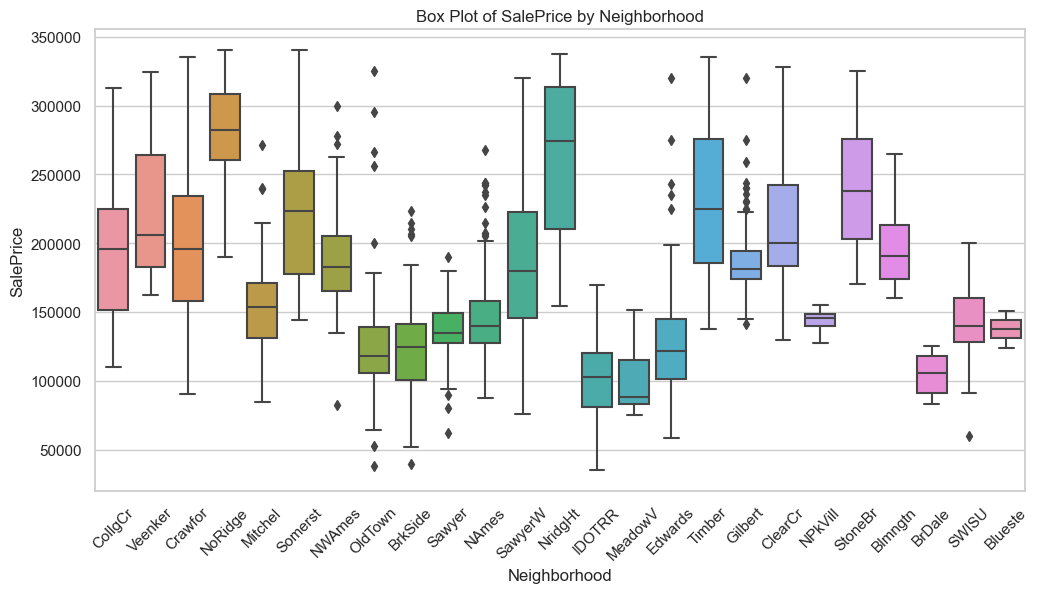

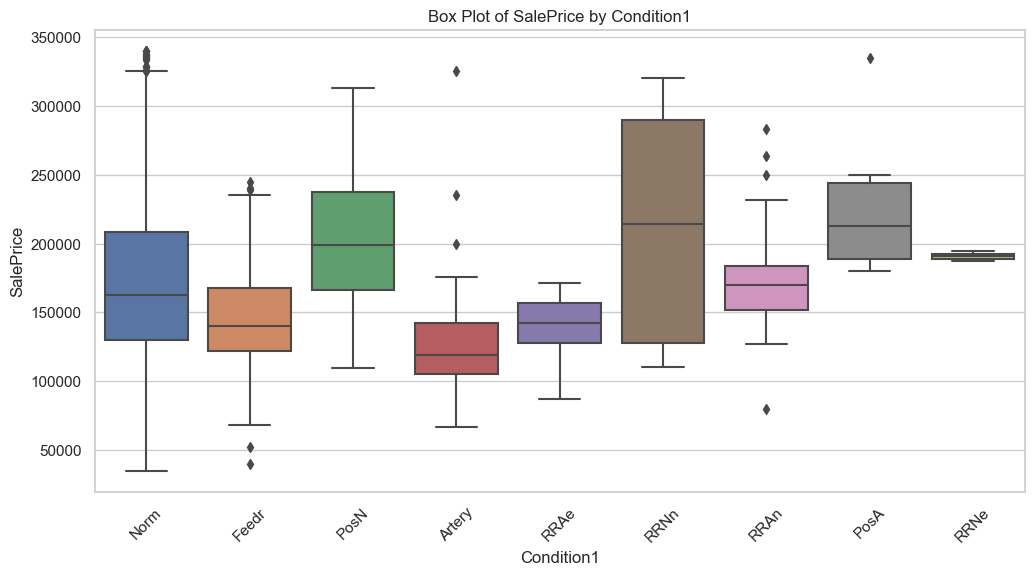

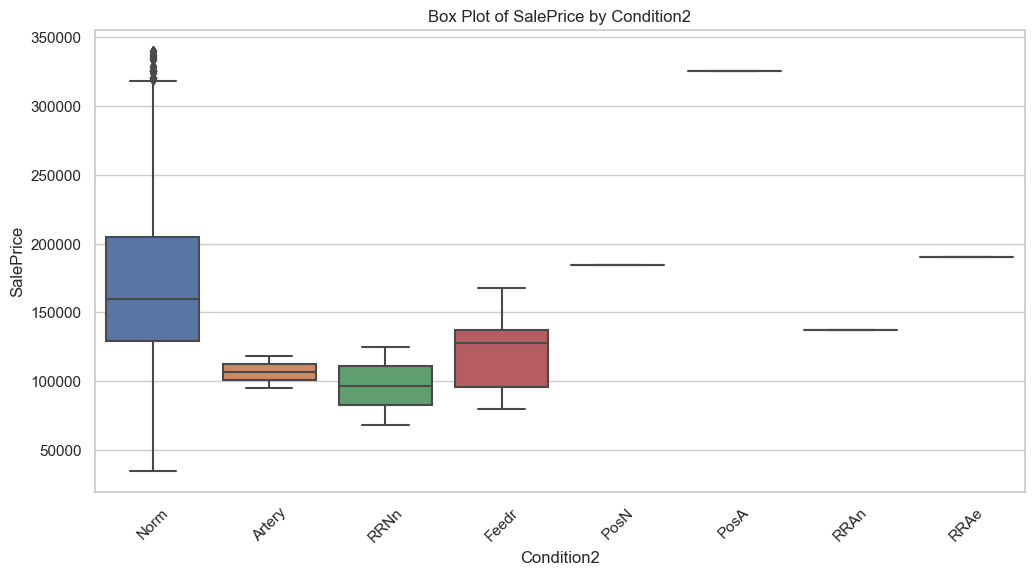

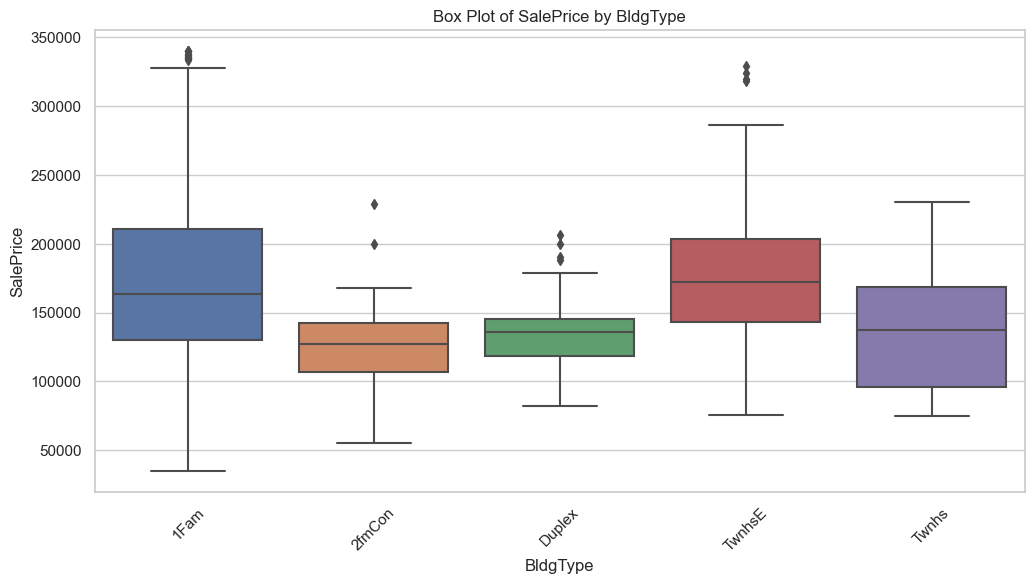

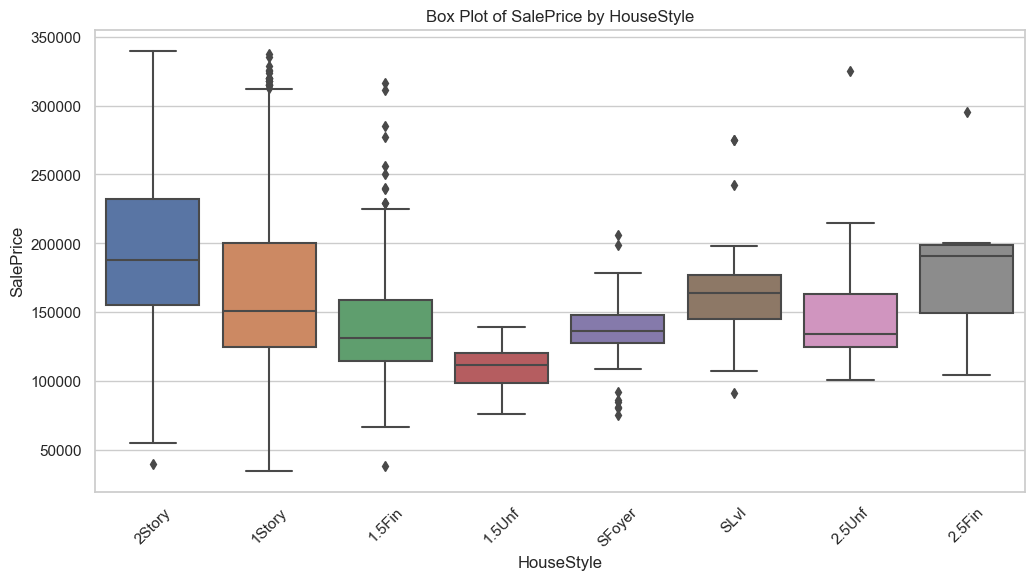

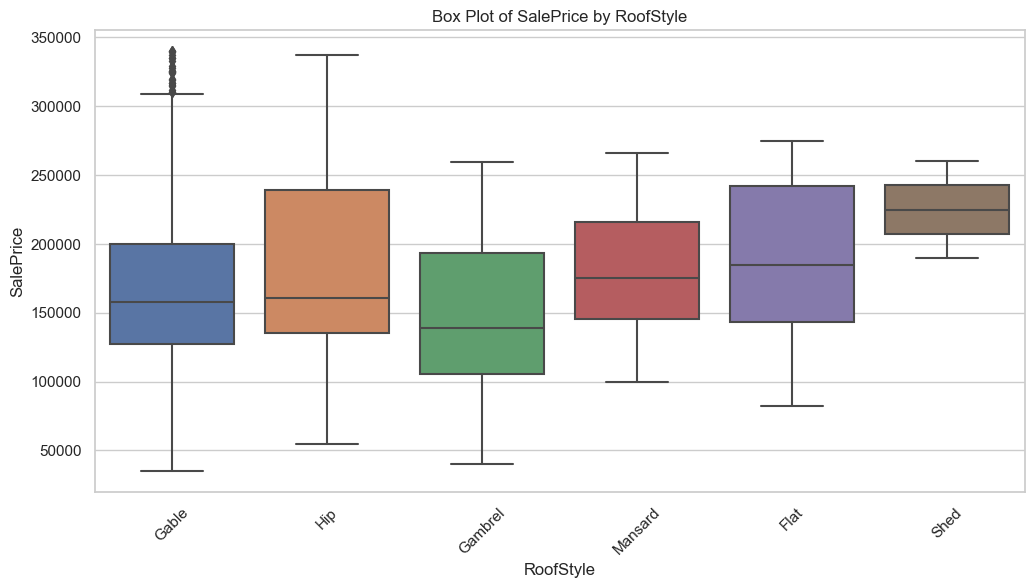

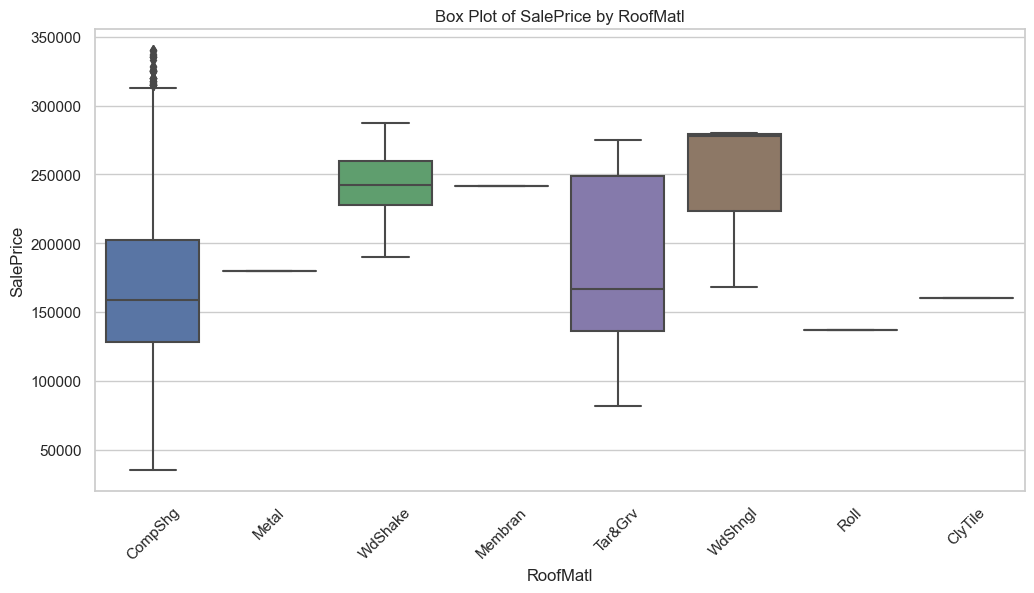

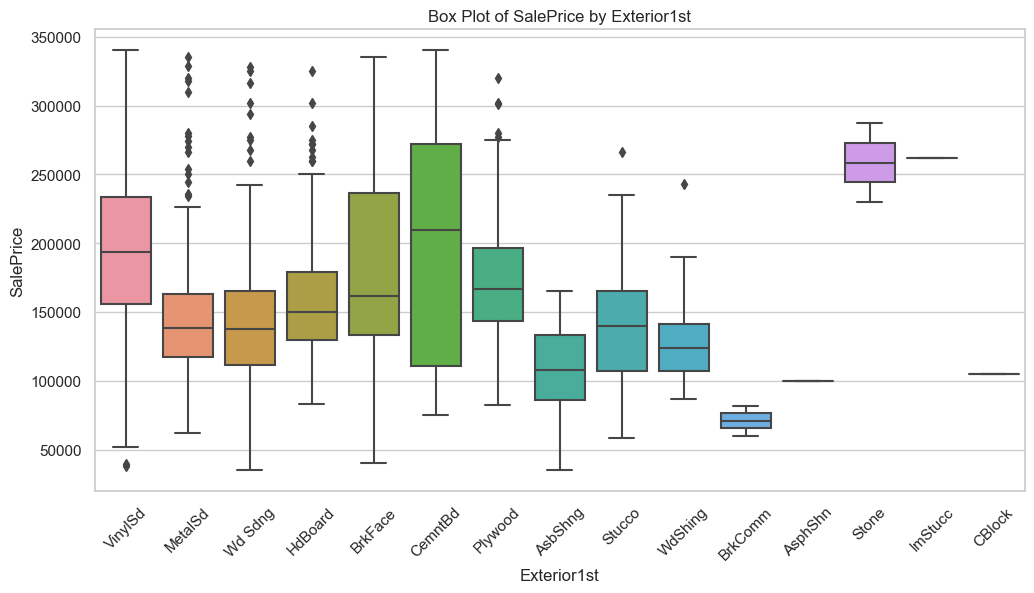

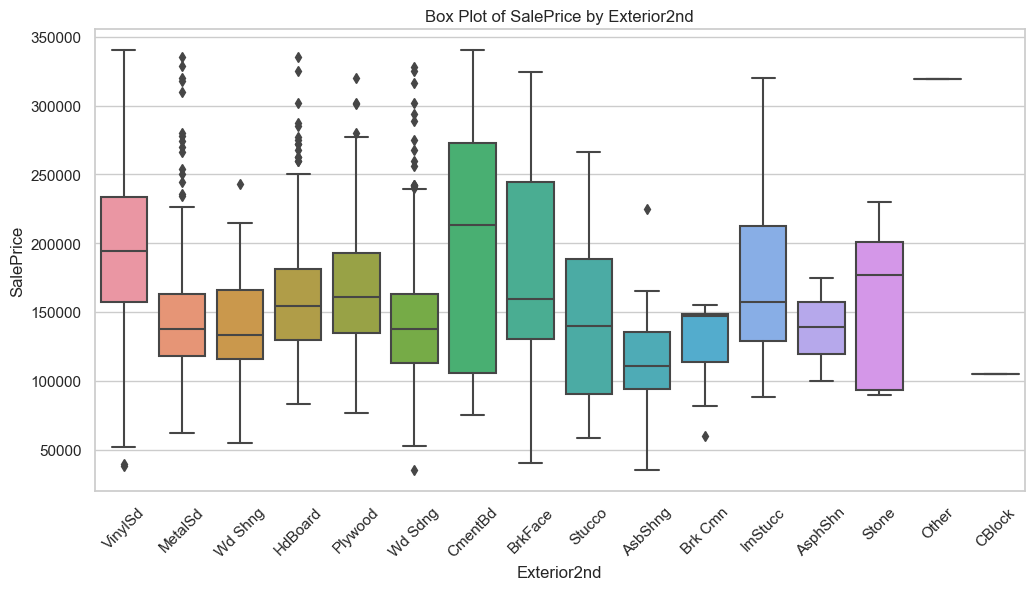

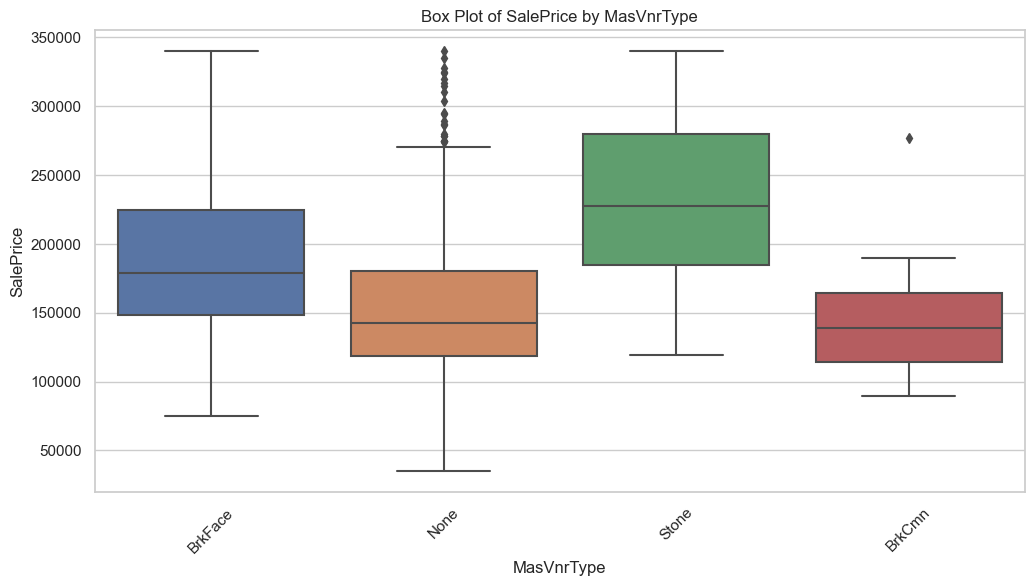

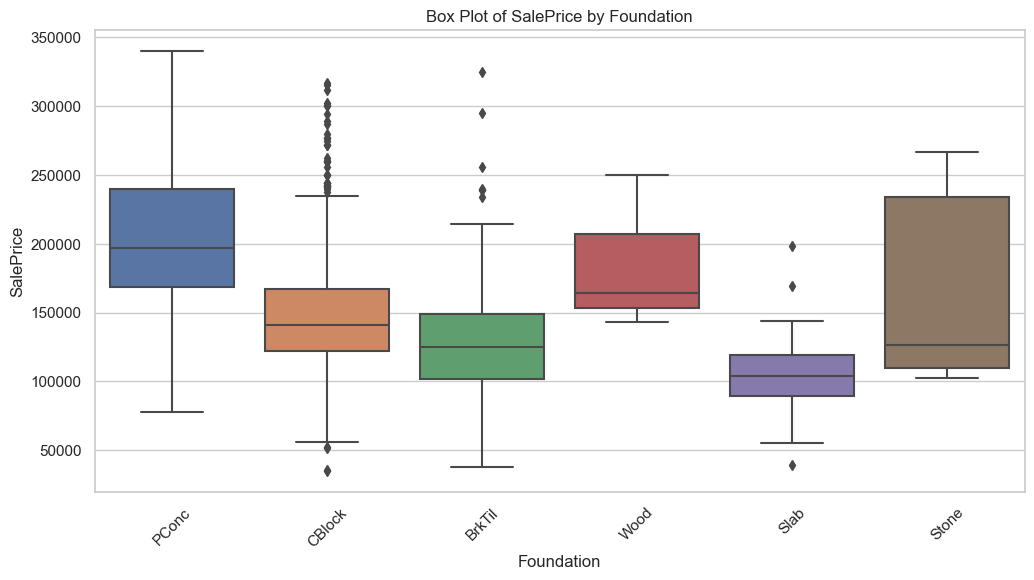

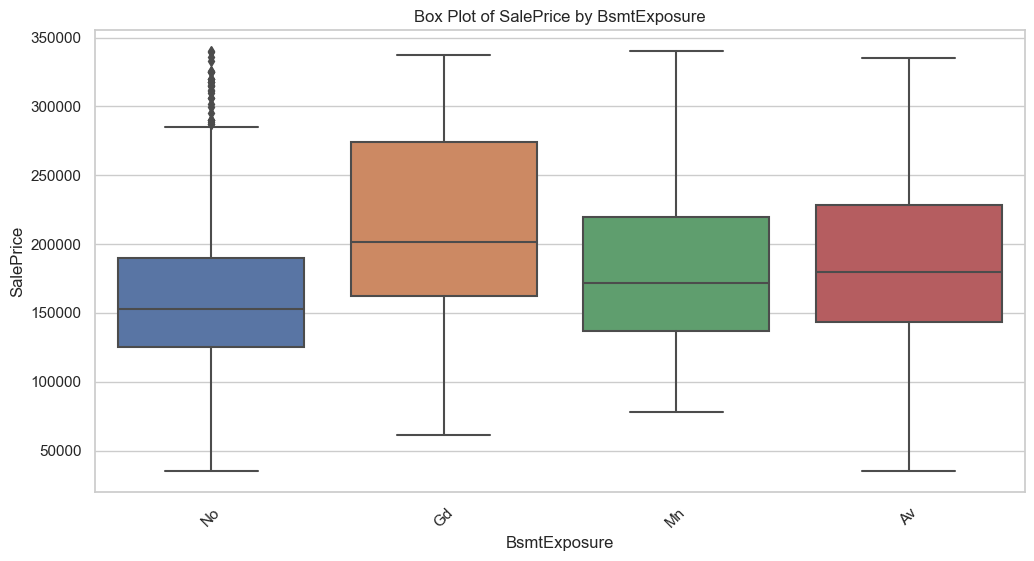

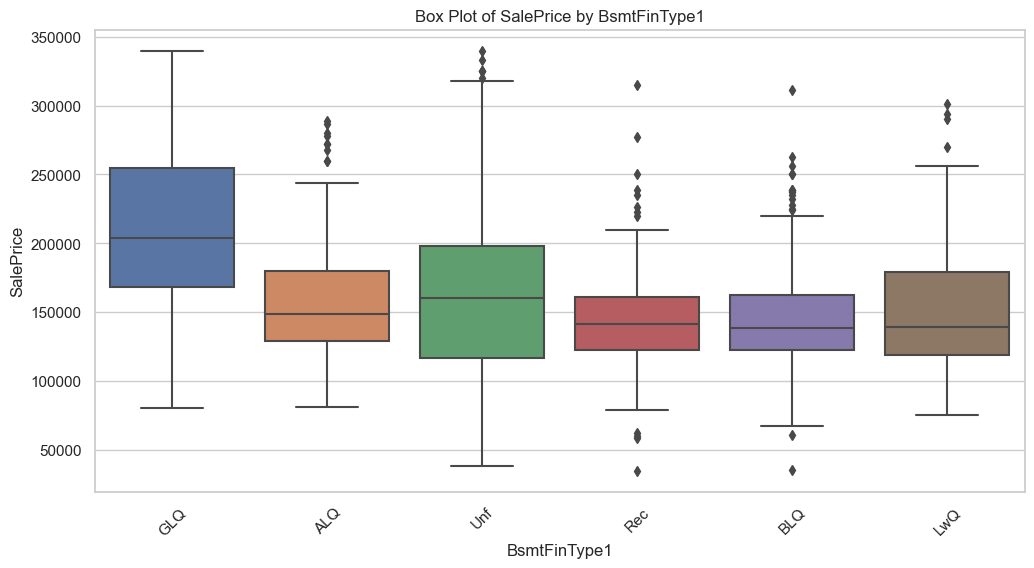

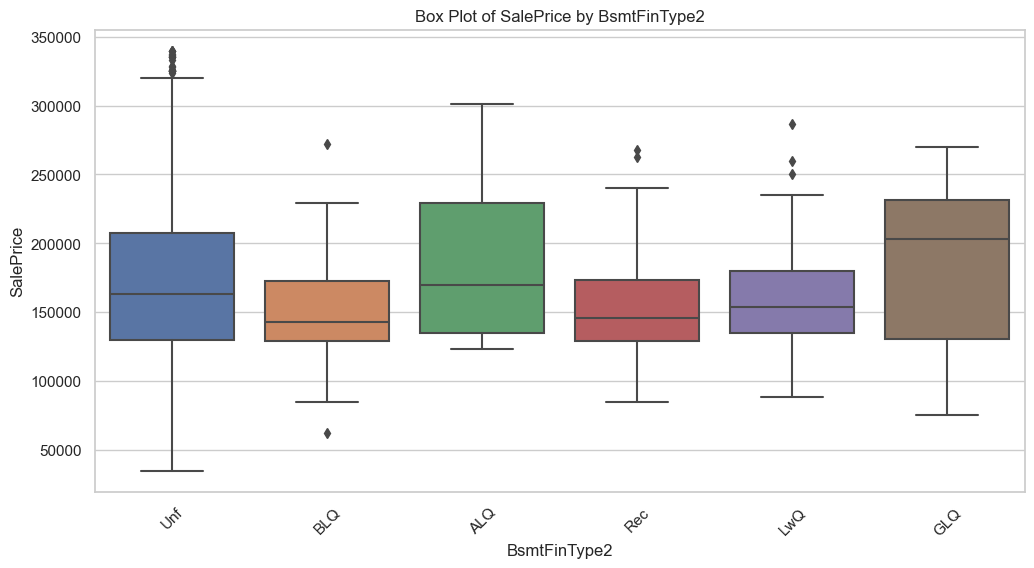

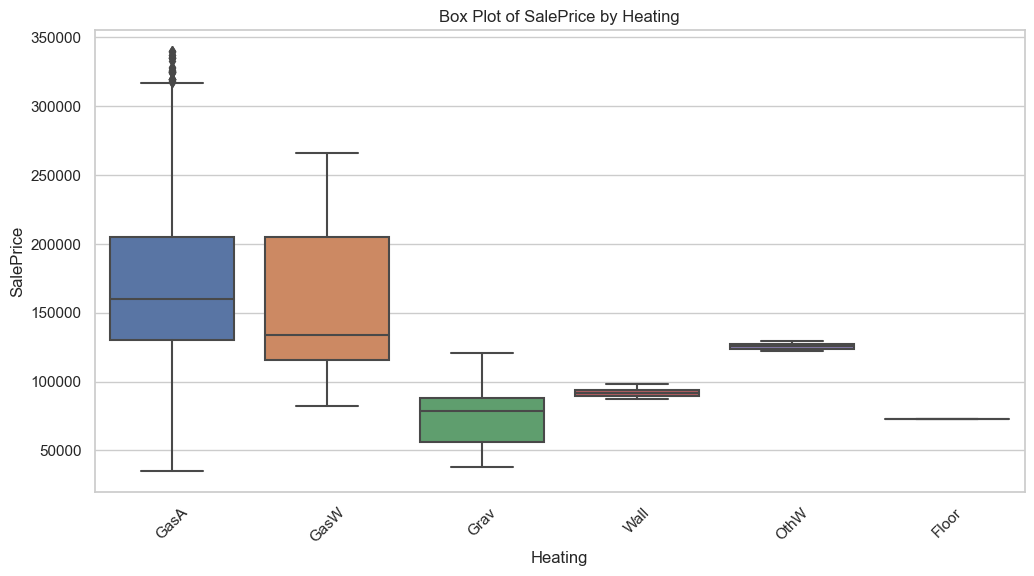

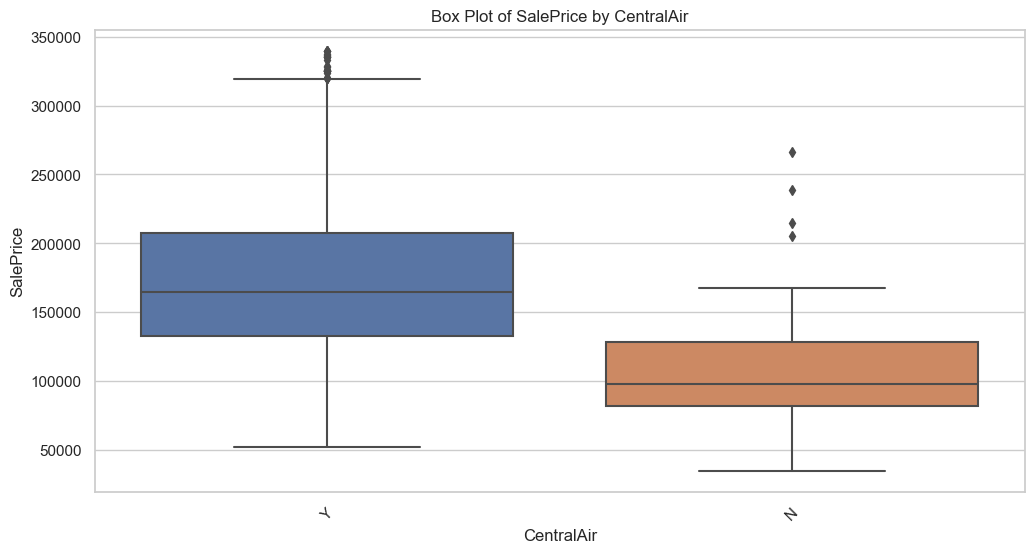

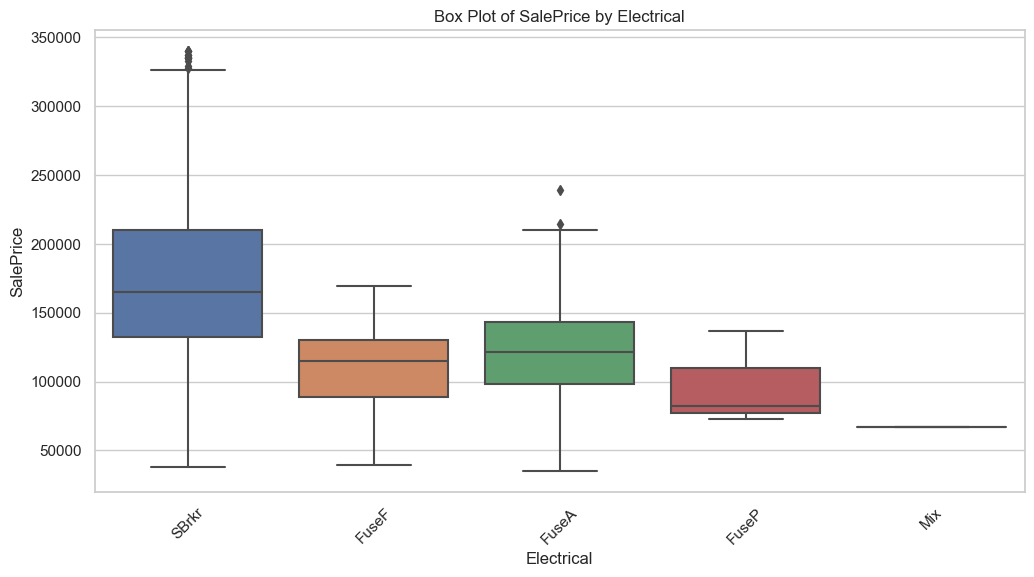

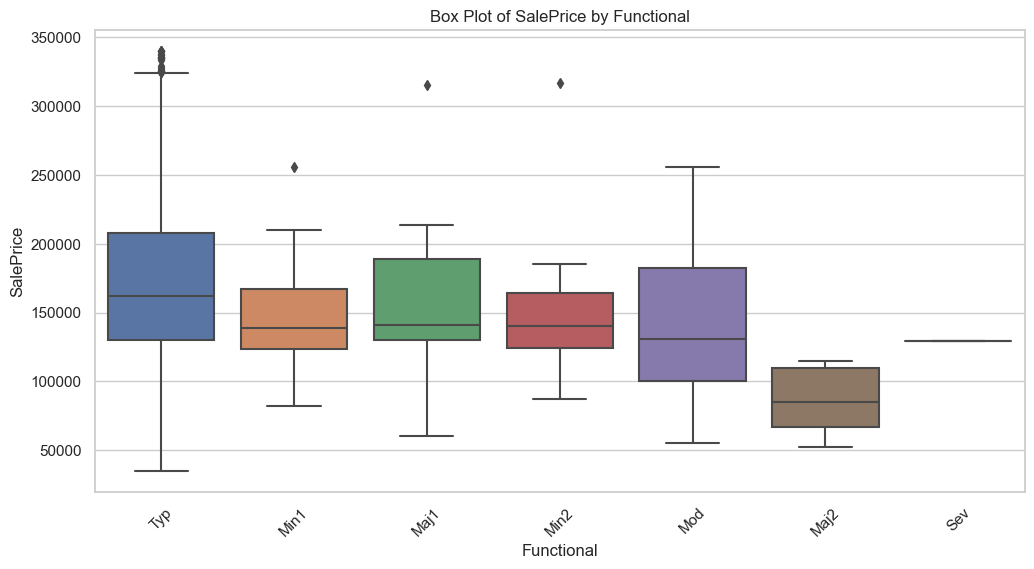

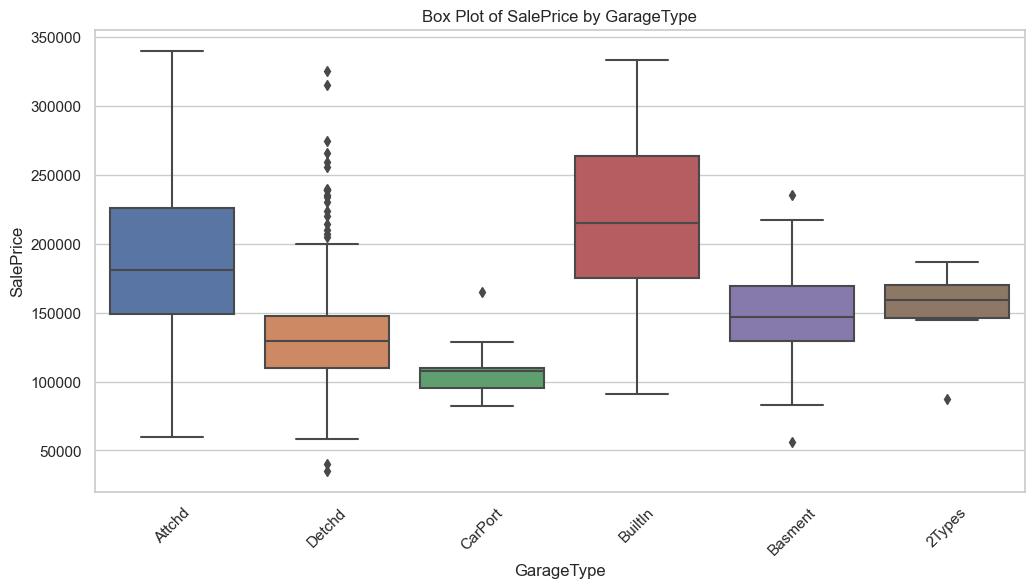

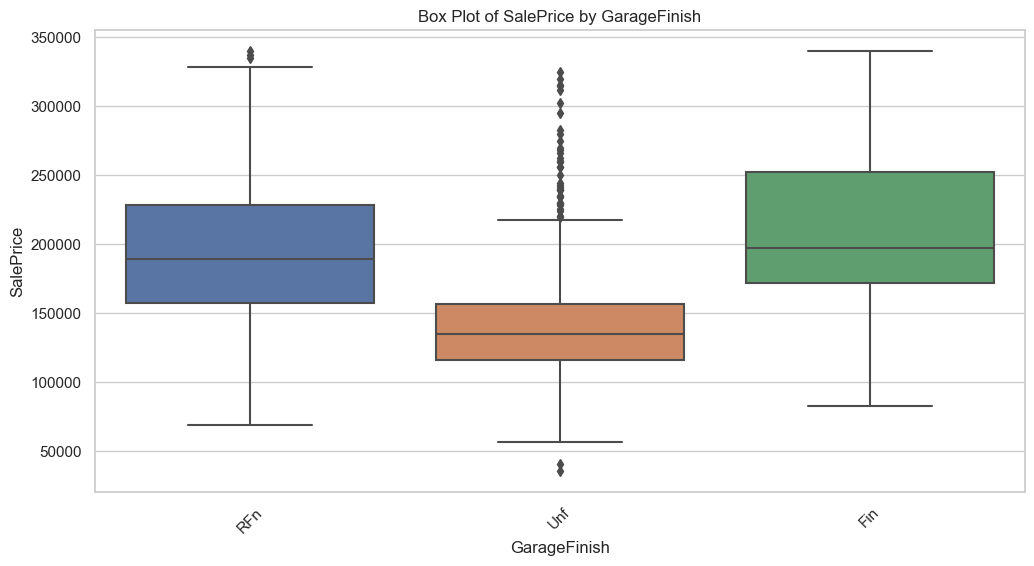

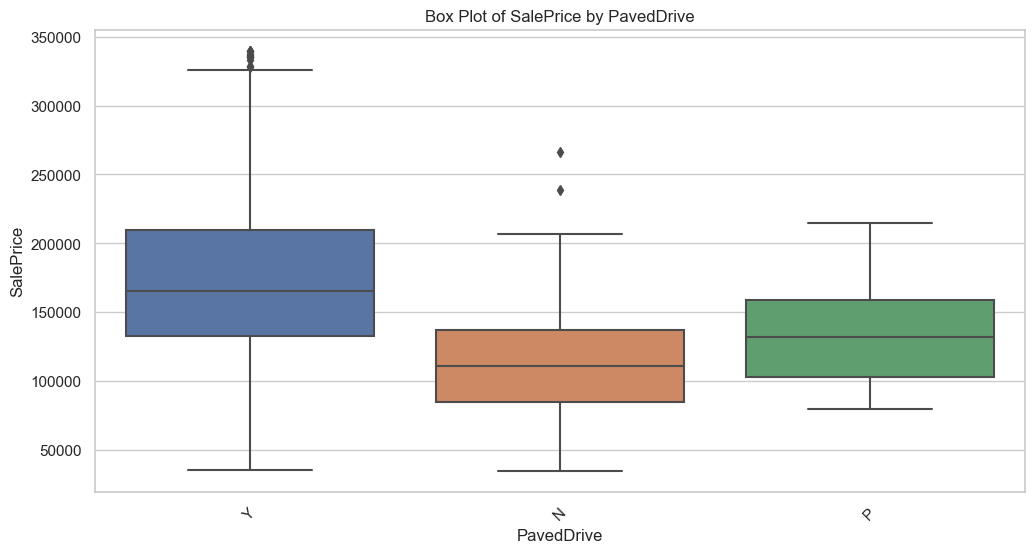

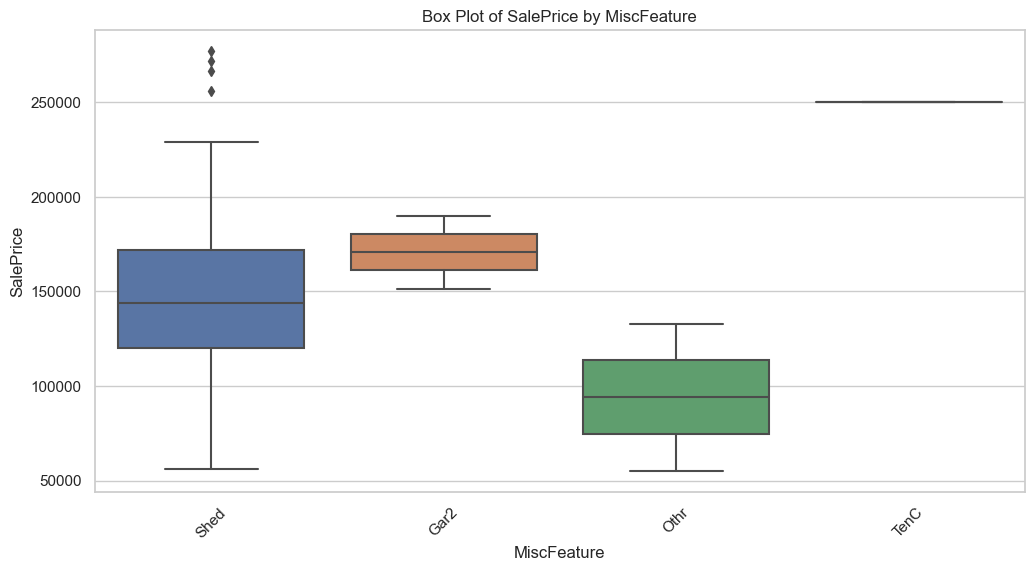

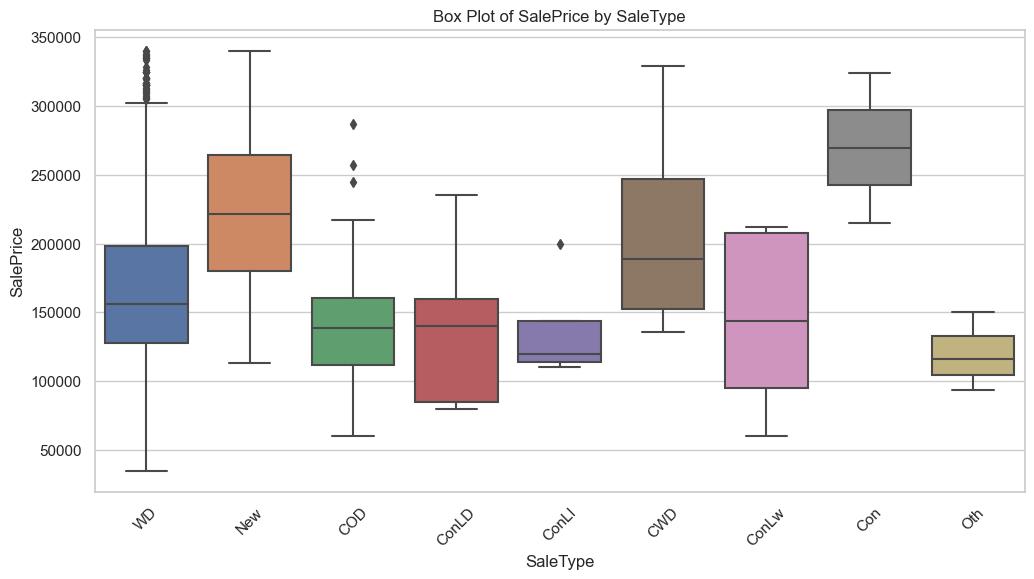

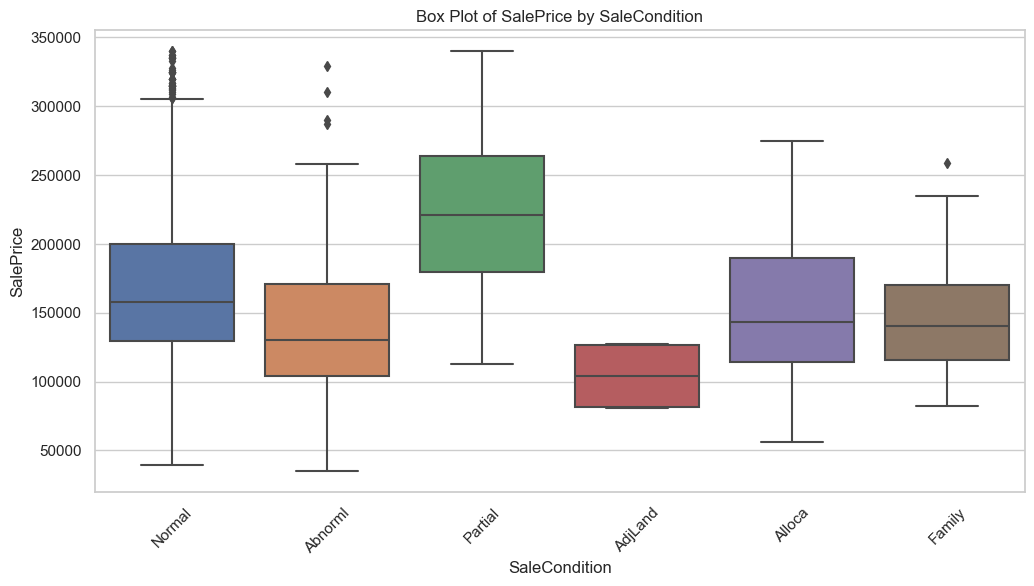

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('filtered_data.csv')  

# Danh sách các thuộc tính phân loại
categorical_features = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 
    'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 
    'SaleType', 'SaleCondition'
]

# Tạo biểu đồ hộp cho từng thuộc tính phân loại
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Box Plot of SalePrice by {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()



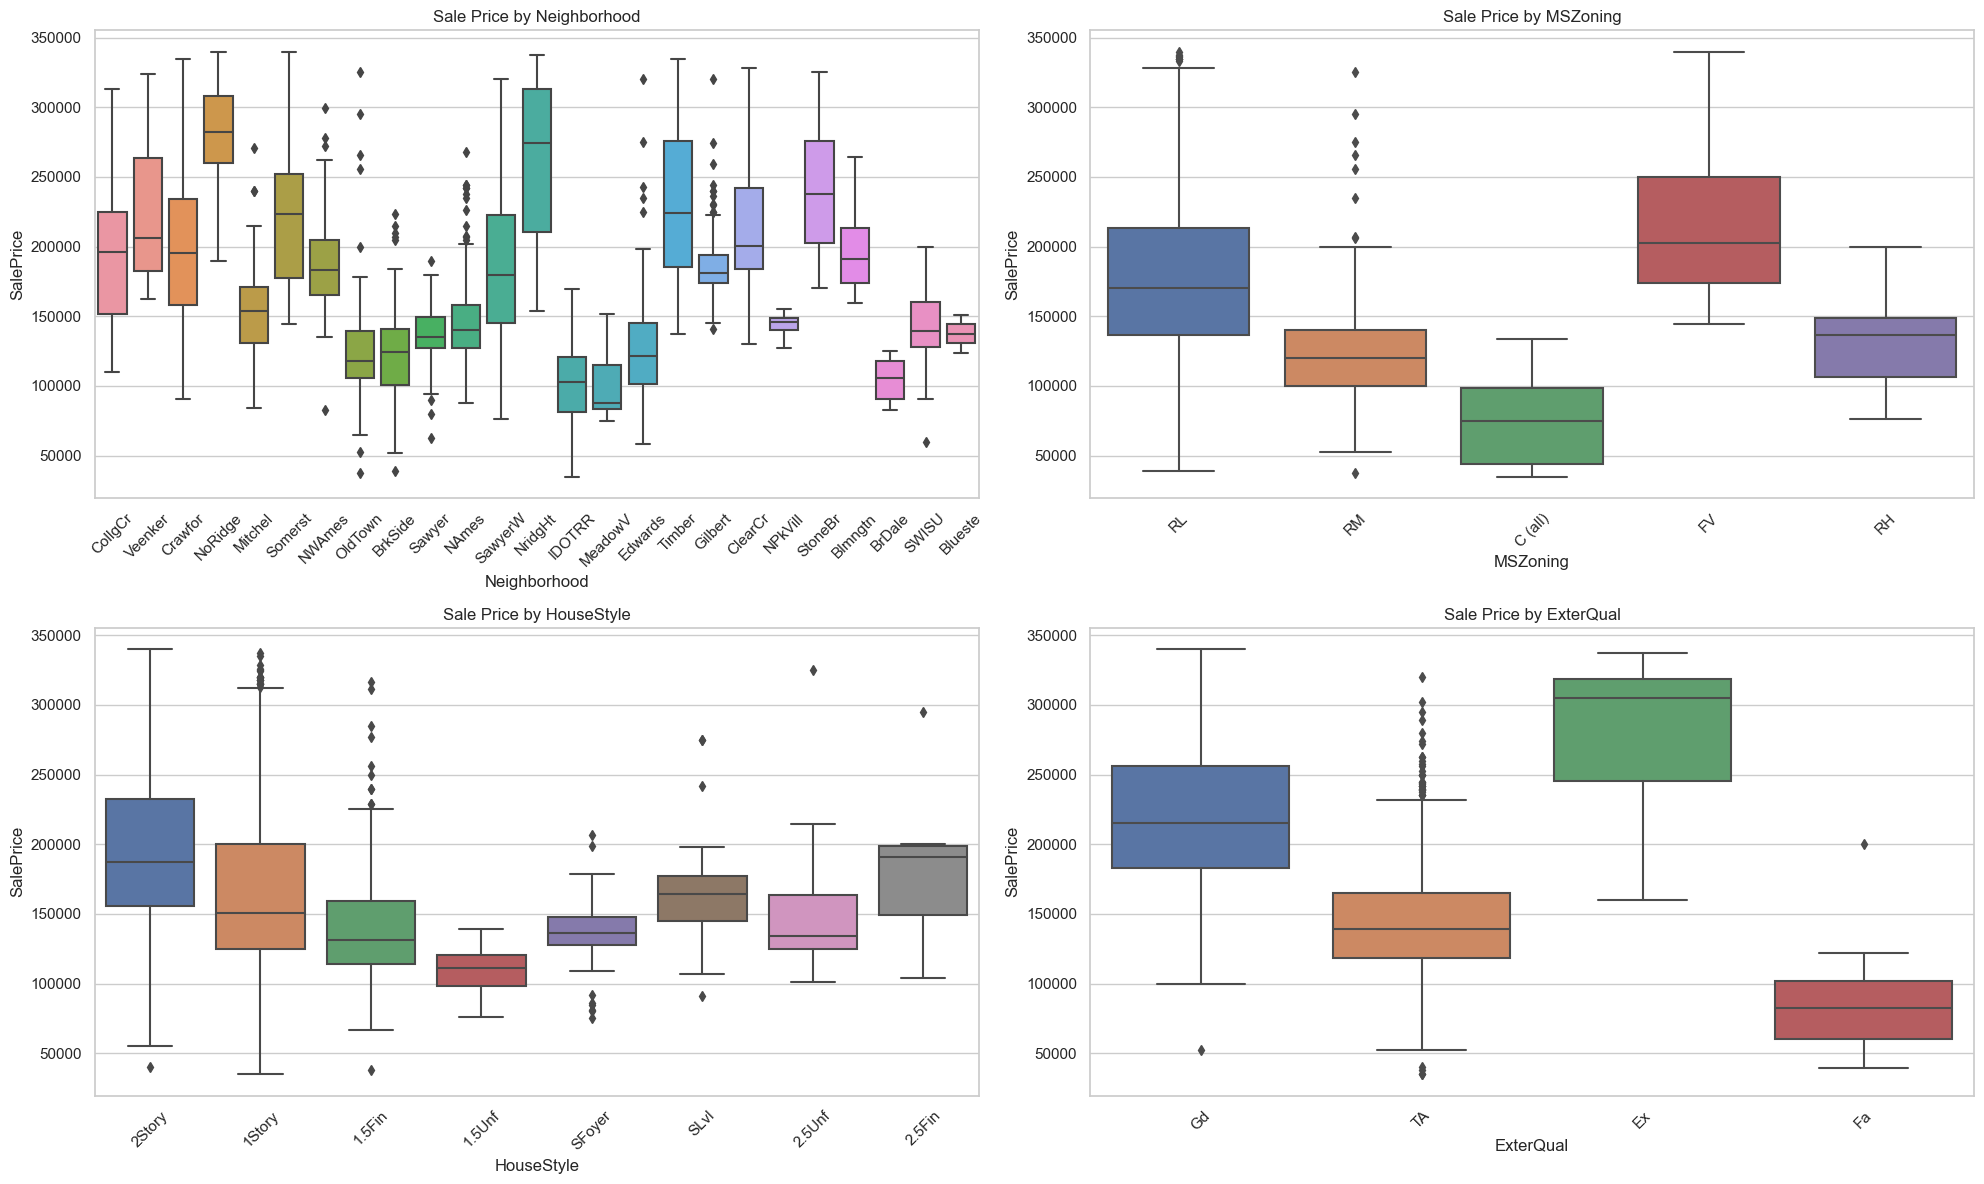

In [14]:
# Selecting categorical features to analyze
categorical_features = ['Neighborhood', 'MSZoning', 'HouseStyle', 'ExterQual']

# Plot box plots for each categorical feature against SalePrice
plt.figure(figsize=(20, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, y='SalePrice')
    plt.title(f'Sale Price by {feature}')
    plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()
plt.show()

**Oulier**

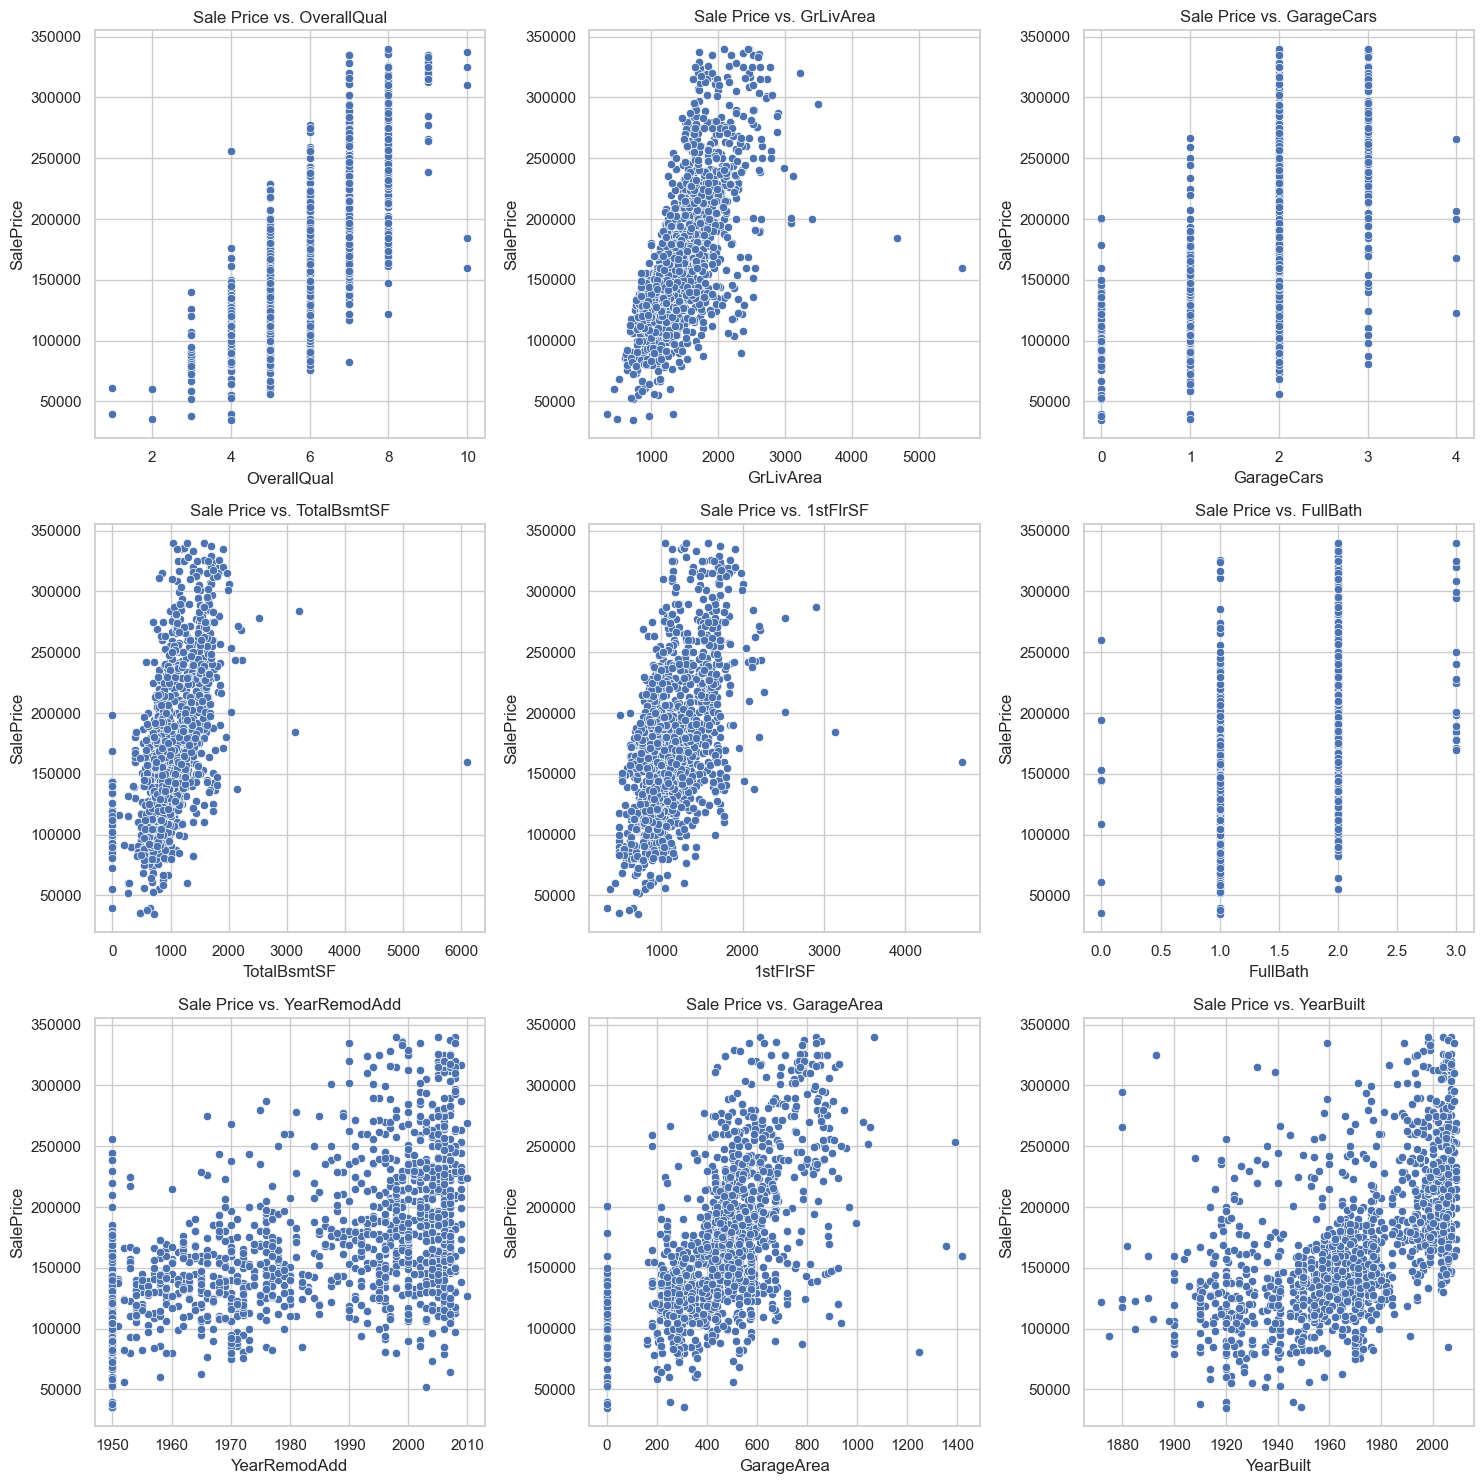

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearRemodAdd', 'GarageArea', 'YearBuilt']

plt.figure(figsize=(15, 15)) 
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'Sale Price vs. {feature}')

plt.tight_layout()
plt.show()


In [16]:
outliers = df[(df['OverallQual'].between(4, 7)) & (df['SalePrice'] > 300000)].index
df = df.drop(outliers)
outliers = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index
df = df.drop(outliers)
df.loc[df['GarageCars']==4,'GarageCars'] = 3
df.loc[df['GarageCars']==3,'GarageCars'] = 2
outliers = df[(df['TotalBsmtSF'] > 3000) ].index
df = df.drop(outliers)
outliers = df[(df['1stFlrSF'] > 3000) ].index
df = df.drop(outliers)
df.loc[df['FullBath']==3,'FullBath'] = 2
outliers = df[(df['GarageArea'] > 1200) ].index
df = df.drop(outliers)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

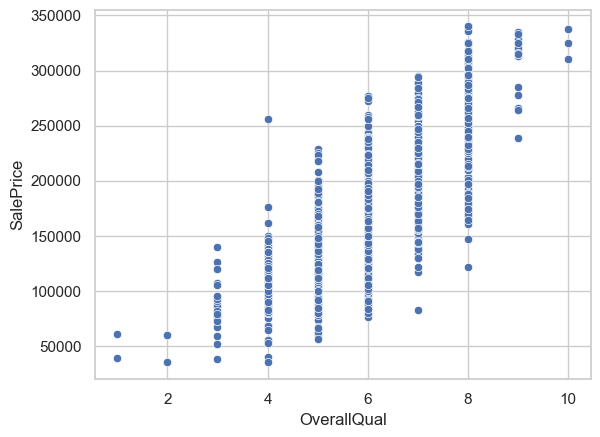

In [17]:
sns.scatterplot(data=df,x='OverallQual',y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

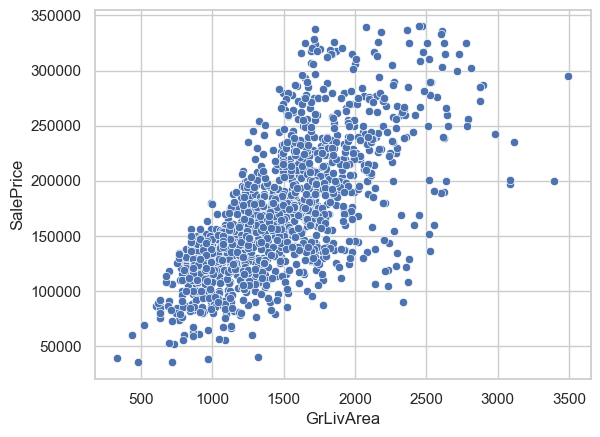

In [18]:
sns.scatterplot(data=df,x='GrLivArea',y='SalePrice')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

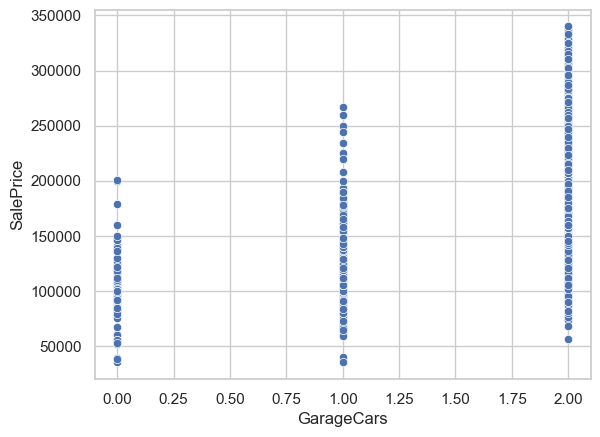

In [19]:
sns.scatterplot(data=df,x='GarageCars',y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

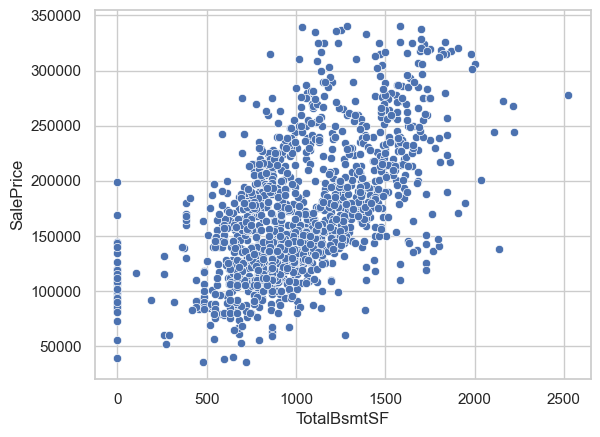

In [20]:
sns.scatterplot(data=df,x='TotalBsmtSF',y='SalePrice')

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

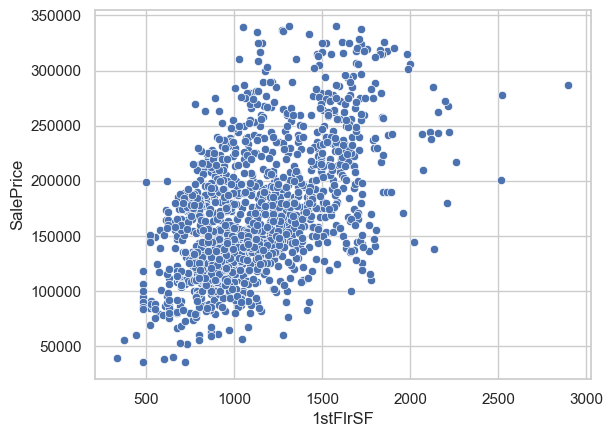

In [21]:
sns.scatterplot(data=df,x='1stFlrSF',y='SalePrice')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

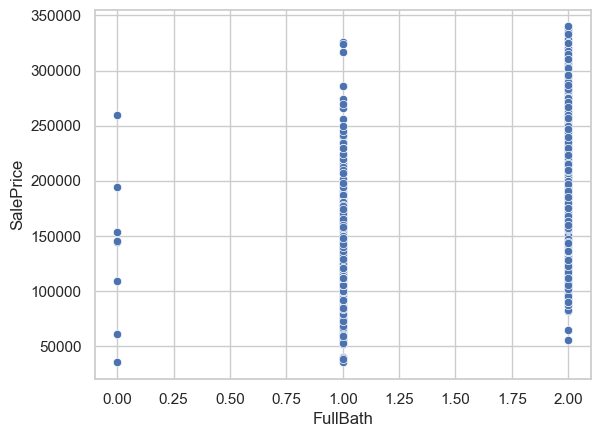

In [22]:
sns.scatterplot(data=df,x='FullBath',y='SalePrice')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

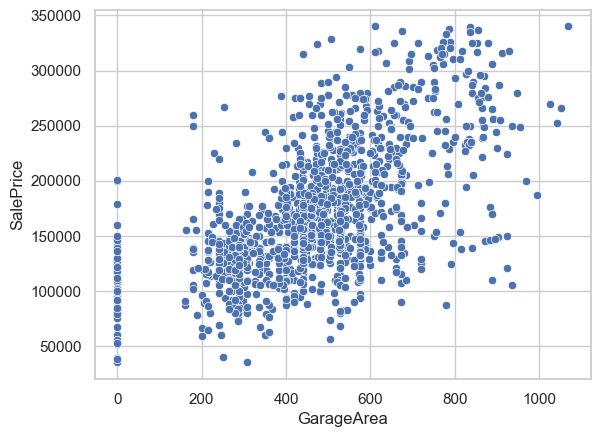

In [23]:
sns.scatterplot(data=df,x='GarageArea',y='SalePrice')

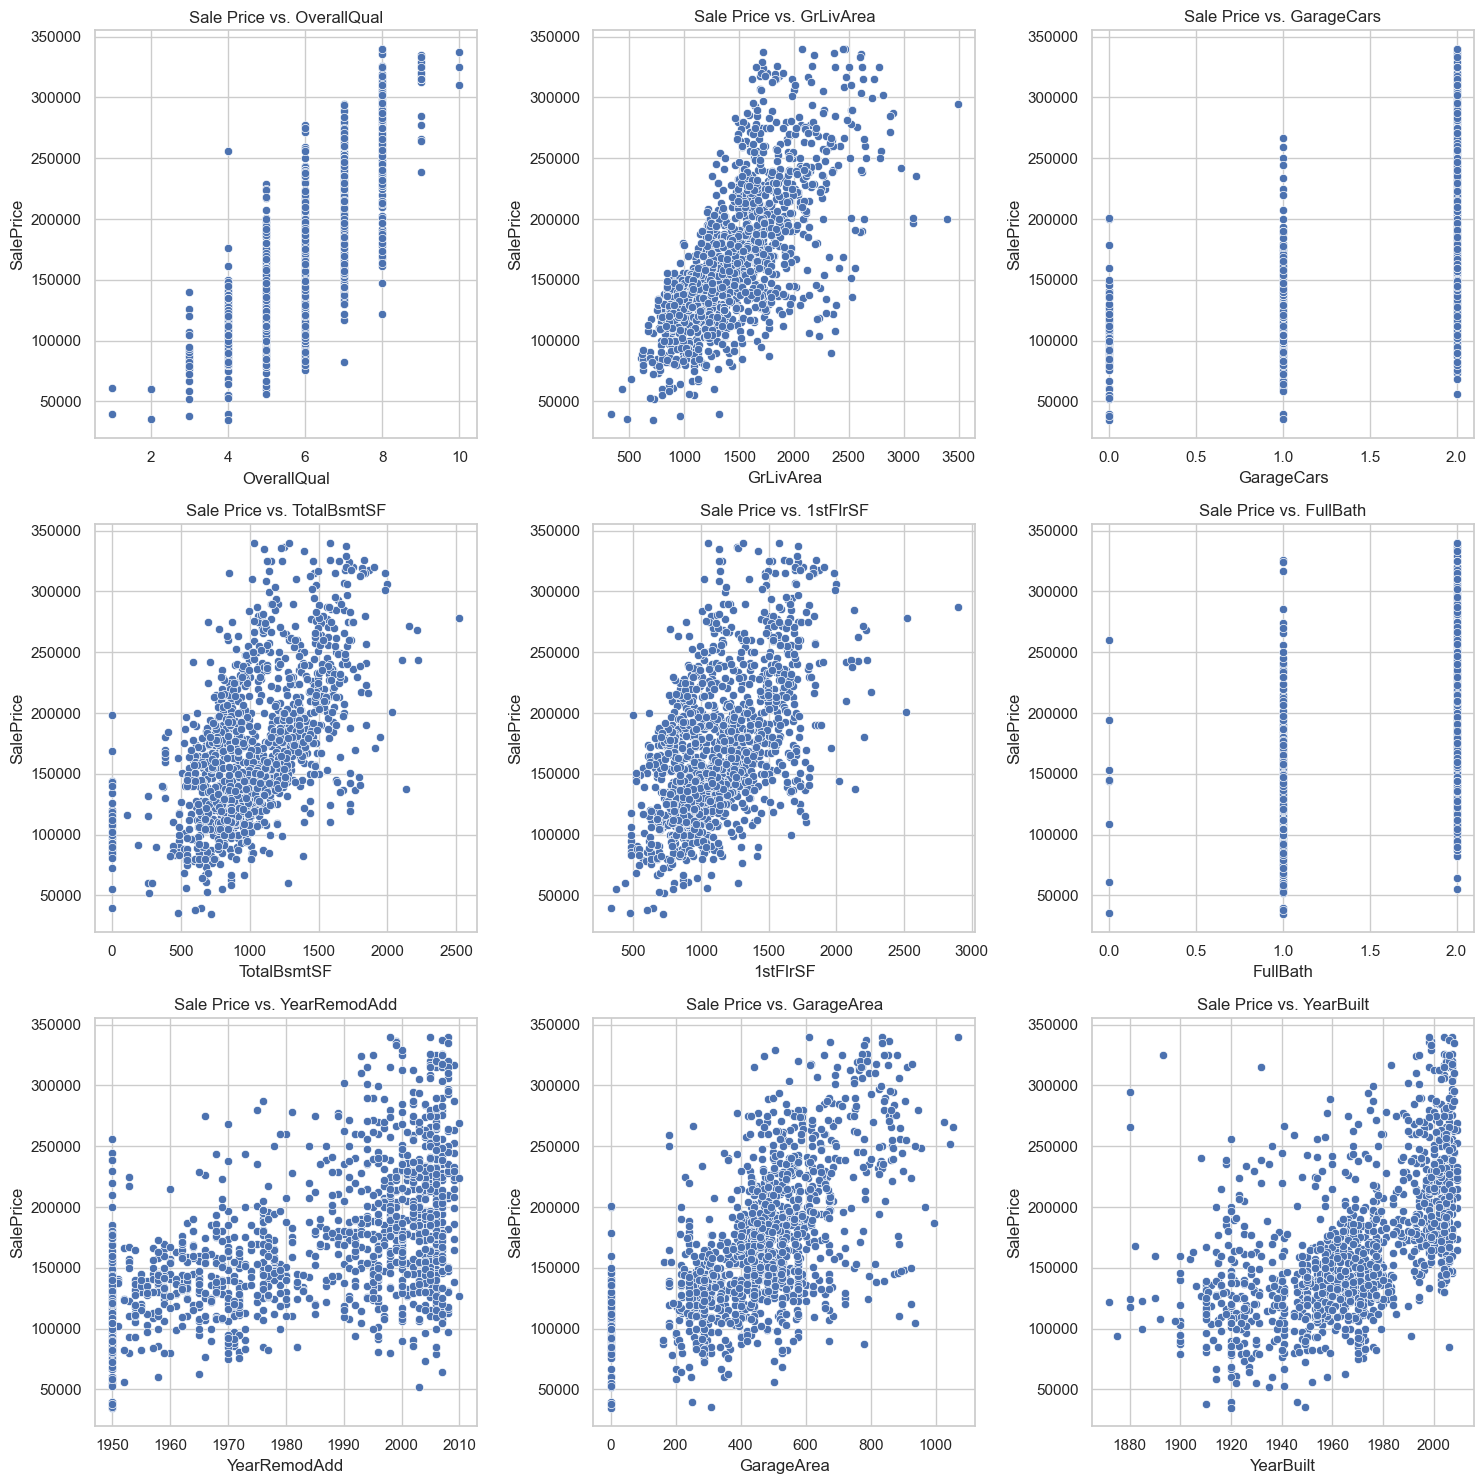

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearRemodAdd', 'GarageArea', 'YearBuilt']

plt.figure(figsize=(15, 15)) 
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'Sale Price vs. {feature}')

plt.tight_layout()
plt.show()


In [25]:
full_df = pd.concat([df,test_df],axis=0).reset_index(drop=True)

In [26]:
full_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2837  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2838  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2839  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2840  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2841  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2837         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2838         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2839         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2840         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2841         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
2837      6   2006        WD         Normal        NaN  
2838      4   2006        WD        Abnorml        NaN  
2839      9   2006        WD        Abnorml        NaN  
2840      7   2006        WD         Normal        NaN  
2841     11   2006        WD         Normal        NaN  

[2842 rows x 81 columns]

In [27]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2842 non-null   int64  
 1   MSSubClass     2842 non-null   int64  
 2   MSZoning       2838 non-null   object 
 3   LotFrontage    2362 non-null   float64
 4   LotArea        2842 non-null   int64  
 5   Street         2842 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2842 non-null   object 
 8   LandContour    2842 non-null   object 
 9   Utilities      2840 non-null   object 
 10  LotConfig      2842 non-null   object 
 11  LandSlope      2842 non-null   object 
 12  Neighborhood   2842 non-null   object 
 13  Condition1     2842 non-null   object 
 14  Condition2     2842 non-null   object 
 15  BldgType       2842 non-null   object 
 16  HouseStyle     2842 non-null   object 
 17  OverallQual    2842 non-null   int64  
 18  OverallC

In [28]:
full_df['MSSubClass'] = full_df['MSSubClass'].apply(str)
full_df['MoSold'] = full_df['MoSold'].apply(str)

In [29]:
import pandas as pd

def return_missing_values(full_df):
    if full_df.empty:
        return pd.DataFrame()
    
    missing_values = full_df.isnull().sum() / len(full_df) * 100
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    missing_values_df = pd.DataFrame(missing_values, columns=['% Missing Values'])
    
    return missing_values_df


In [30]:
missing_values_df = return_missing_values(df)
print(missing_values_df)


              % Missing Values
PoolQC               99.638467
MiscFeature          96.167751
Alley                93.420101
Fence                80.043384
FireplaceQu          49.674620
LotFrontage          18.293565
GarageType            5.856833
GarageYrBlt           5.856833
GarageFinish          5.856833
GarageQual            5.856833
GarageCond            5.856833
BsmtExposure          2.747650
BsmtFinType1          2.675343
BsmtFinType2          2.675343
BsmtCond              2.675343
BsmtQual              2.675343
MasVnrArea            0.506146
MasVnrType            0.506146
Electrical            0.072307


              % Missing Values
PoolQC               99.718508
MiscFeature          96.340605
Alley                93.033075
Fence                80.084448
SalePrice            51.337087
FireplaceQu          49.859254
LotFrontage          16.889514
GarageCond            5.594652
GarageYrBlt           5.594652
GarageFinish          5.594652
GarageQual            5.594652
GarageType            5.524279
BsmtExposure          2.885292
BsmtCond              2.885292
BsmtQual              2.850106
BsmtFinType1          2.779733
BsmtFinType2          2.779733
MasVnrType            0.809289
MasVnrArea            0.774103
MSZoning              0.140746
Functional            0.070373
BsmtHalfBath          0.070373
BsmtFullBath          0.070373
Utilities             0.070373
KitchenQual           0.035186
TotalBsmtSF           0.035186
BsmtUnfSF             0.035186
GarageCars            0.035186
GarageArea            0.035186
BsmtFinSF2            0.035186
BsmtFinSF1            0.035186
Exterior

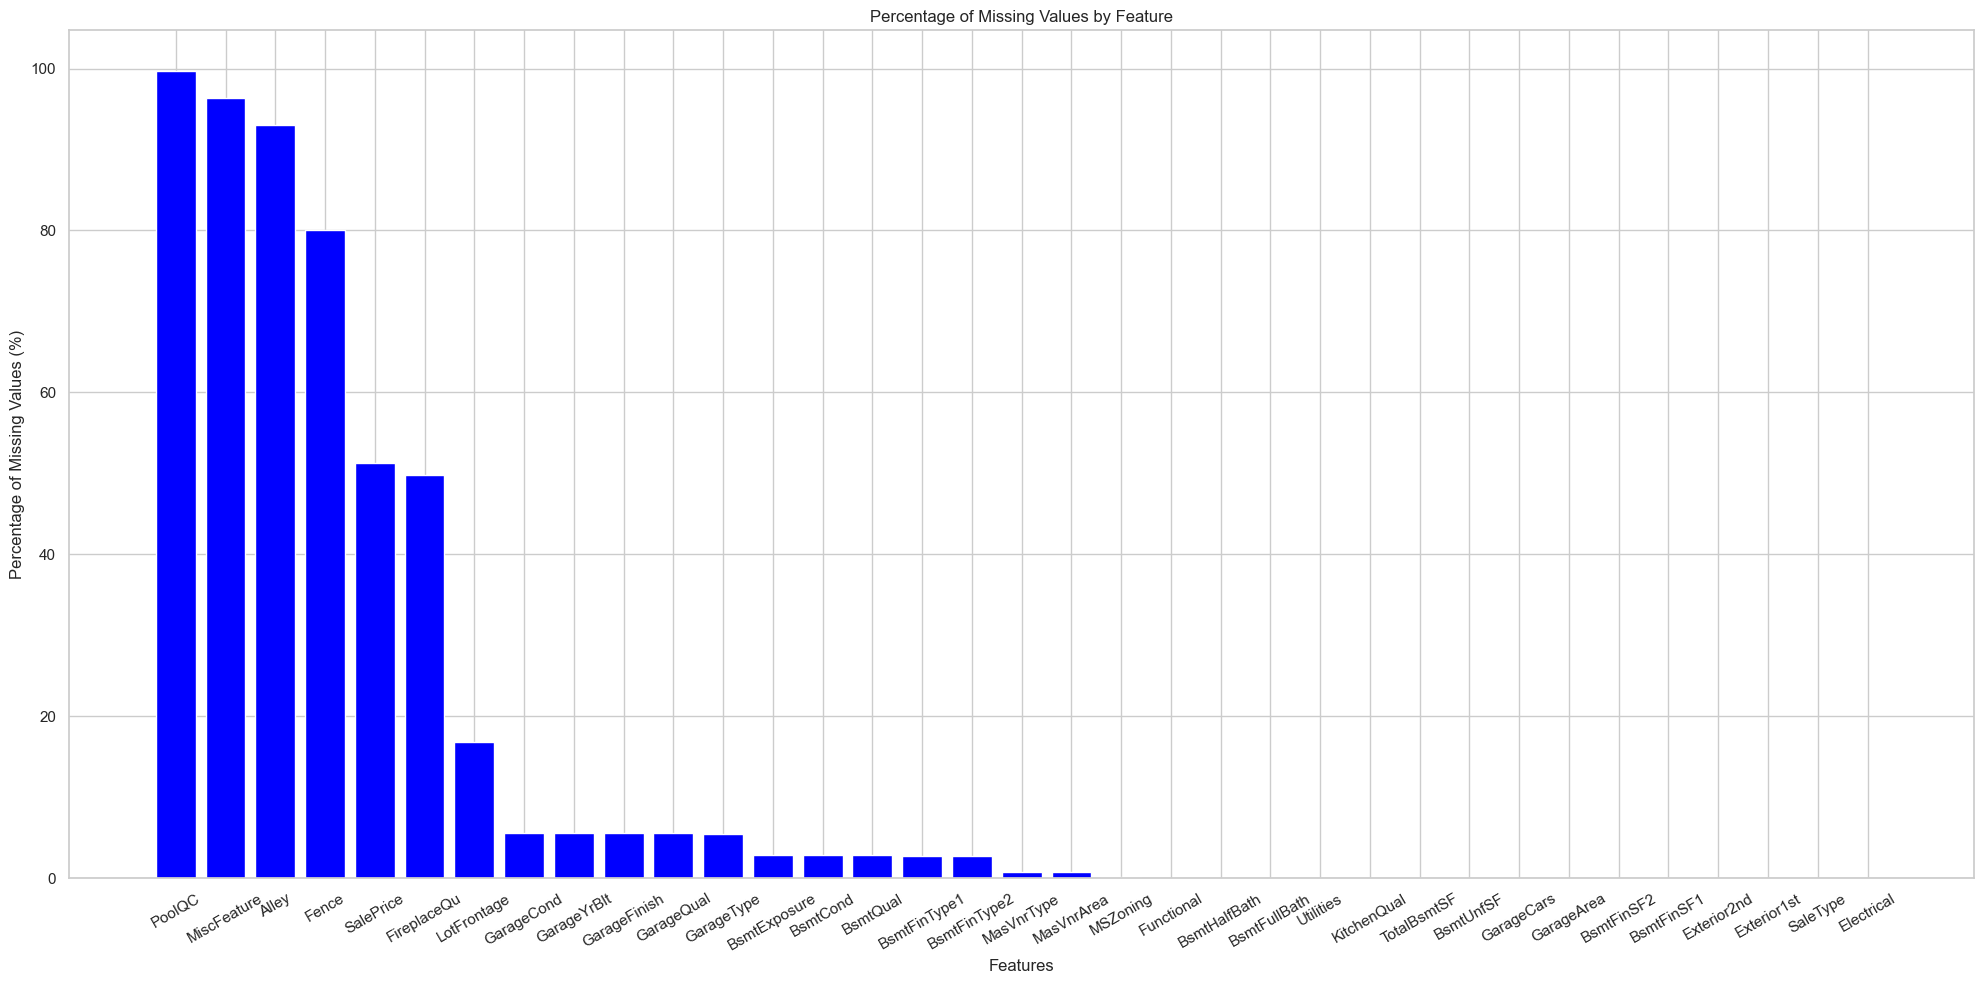

In [31]:
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn đã được định nghĩa
missing_values_df = return_missing_values(full_df)

# Kiểm tra lại cấu trúc của DataFrame
print(missing_values_df)

# Vẽ biểu đồ cột
plt.figure(figsize=(20,10))
plt.bar(missing_values_df.index, missing_values_df['% Missing Values'], color='blue')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Values by Feature')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


              Missing Values  Percentage
MSZoning                   4    0.140746
LotFrontage              480   16.889514
Alley                   2644   93.033075
Utilities                  2    0.070373
Exterior1st                1    0.035186
Exterior2nd                1    0.035186
MasVnrType                23    0.809289
MasVnrArea                22    0.774103
BsmtQual                  81    2.850106
BsmtCond                  82    2.885292
BsmtExposure              82    2.885292
BsmtFinType1              79    2.779733
BsmtFinSF1                 1    0.035186
BsmtFinType2              79    2.779733
BsmtFinSF2                 1    0.035186
BsmtUnfSF                  1    0.035186
TotalBsmtSF                1    0.035186
Electrical                 1    0.035186
BsmtFullBath               2    0.070373
BsmtHalfBath               2    0.070373
KitchenQual                1    0.035186
Functional                 2    0.070373
FireplaceQu             1417   49.859254
GarageType      

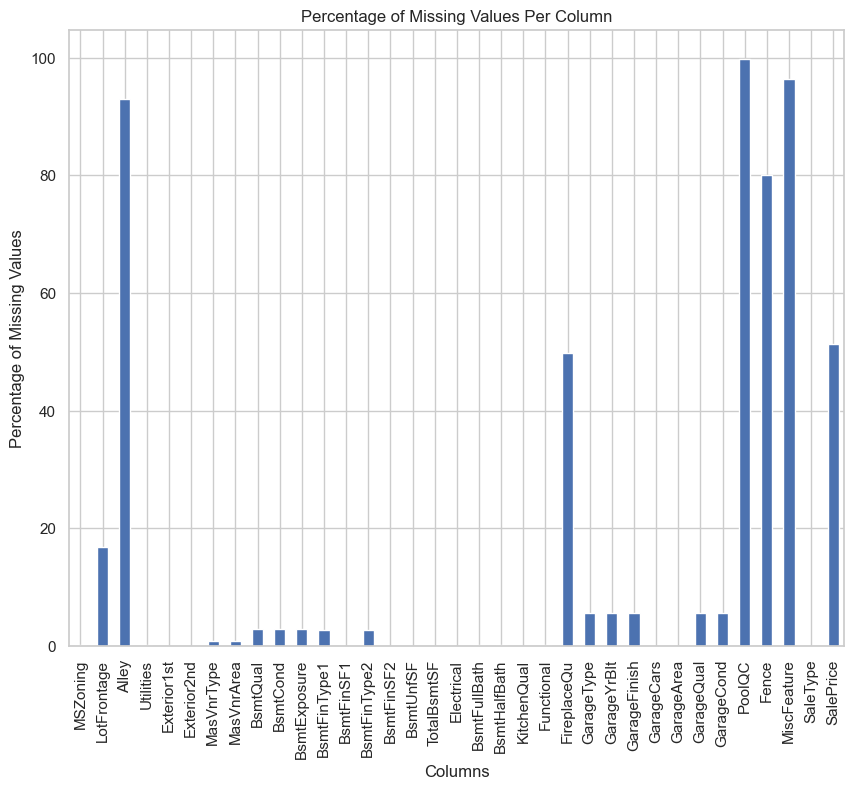

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the number of missing values for each column
missing_data = full_df.isnull().sum()

# Only keep columns where there are missing data
missing_data = missing_data[missing_data > 0]

# Calculate the percentage of missing values for these columns
missing_percentage = (missing_data / len(full_df)) * 100

# Create a DataFrame to hold the number of missing values and the percentage
missing_stats = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Print the DataFrame with missing data statistics
print(missing_stats)

# Plotting the percentage of missing data for each column
plt.figure(figsize=(10, 8))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [33]:
mode_cols = 'Electrical, SaleType, Exterior1st, Exterior2nd, KitchenQual, Utilities, Functional, MSZoning'.split(', ')

for col in mode_cols:
    full_df[col] = full_df[col].fillna(full_df[col].mode()[0])

In [34]:
NA_cols = 'PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageCond, GarageFinish, GarageQual, GarageType, BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2, BsmtFinType1'.split(', ')

for col in NA_cols:
    full_df[col] = full_df[col].fillna("NA")

In [35]:
full_df['MasVnrType'] = full_df['MasVnrType'].fillna('None')

In [36]:
null_cols = 'TotalBsmtSF, BsmtUnfSF, GarageCars, GarageArea, BsmtFinSF2, BsmtFinSF1, BsmtHalfBath, BsmtFullBath, GarageYrBlt, MasVnrArea'.split(', ')

for col in null_cols: 
    full_df[col] = full_df[col].fillna(0)

In [37]:
mean_lot_frontage = full_df.groupby('Neighborhood')['LotFrontage'].mean()

In [38]:
mapping = dict(zip(mean_lot_frontage.index,mean_lot_frontage))

full_df['LotFrontage'] = full_df['LotFrontage'].fillna(full_df['Neighborhood'].map(mapping))

In [39]:
return_missing_values(full_df)

% Missing Values
SalePrice         51.337087

In [40]:
full_df = pd.get_dummies(full_df,drop_first=True)

In [41]:
categorical_features = full_df.select_dtypes(include=['object']).columns.tolist()
categorical_summary = full_df[categorical_features].head()
categorical_features, categorical_summary

([],
 Empty DataFrame
 Columns: []
 Index: [0, 1, 2, 3, 4])

In [42]:
df = full_df[full_df['SalePrice'].notnull()]
test_df = full_df[full_df['SalePrice'].isnull()].drop('SalePrice', axis=1)

In [43]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [44]:
df.shape

(1383, 284)

In [45]:
test_df.shape

(1459, 283)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_lin_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_lin_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_lin_pred))
r2 = r2_score(y_test, y_lin_pred)
print(mae,rmse,r2)

14599.440031910162 21717.312630358134 0.861797425967376


In [48]:
lasso_model = LassoCV(alphas=[1, 10, 100], cv=10, random_state=42, max_iter=100000)
lasso_model.fit(X_train,y_train)
y_lasso_pred = lasso_model.predict(X_test)
mae = mean_absolute_error(y_test, y_lasso_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))
r2 = r2_score(y_test, y_lasso_pred)

print(mae,rmse,r2)

12521.666997370734 18169.461896040866 0.9032640064880179


In [49]:
lasso_model.alpha_

100

In [50]:
ridge_model = RidgeCV(alphas=(0.1, 0.5, 1, 5, 10, 50, 100), scoring='neg_mean_squared_error')
ridge_model.fit(X_train,y_train)
y_ridge_pred = ridge_model.predict(X_test)
mae = mean_absolute_error(y_test, y_ridge_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
r2 = r2_score(y_test, y_ridge_pred)

print(mae,rmse,r2)

12660.832152699535 18407.28167603113 0.9007150819628935


In [51]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10)
elastic_model.fit(X_train, y_train)
y_elastic_pred = elastic_model.predict(X_test)

mae = mean_absolute_error(y_test, y_elastic_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_elastic_pred))
r2 = r2_score(y_test, y_elastic_pred)

print(mae,rmse,r2)

19631.88740371119 27386.33250512344 0.7802283246622009


In [52]:
lasso = Lasso(alpha=100)
lasso.fit(X,y)
predictions = lasso.predict(test_df)

In [53]:
submission1= pd.DataFrame(data = {'Id': range(1461,2920),
                                'SalePrice': predictions})
submission1

Id      SalePrice
0     1461  123921.609413
1     1462  158071.341018
2     1463  181430.079482
3     1464  199224.333140
4     1465  188129.200051
...    ...            ...
1454  2915   79741.809260
1455  2916   72662.980156
1456  2917  175248.943400
1457  2918  113349.029244
1458  2919  210729.590673

[1459 rows x 2 columns]

In [54]:
submission1.to_csv("submission1.csv", index=False)

In [55]:
df.to_csv("df.csv", index=False)